# Submission Akhir: Menyelesaikan Permasalahan EduTech

- Nama: Muhamad Ridwan Usmana
- Email: mridwanusmana15@gmail.com
- Id Dicoding: mr_usman

# Business Understanding

Jaya Jaya Institut, sebuah institusi pendidikan yang telah beroperasi sejak tahun 2000, memiliki reputasi yang baik dalam mencetak lulusan berkualitas. Namun, institusi ini dihadapkan pada tantangan besar terkait tingginya tingkat siswa yang tidak menyelesaikan pendidikan atau dropout.

Tingginya tingkat dropout menjadi isu yang signifikan bagi Jaya Jaya Institut karena dapat berdampak negatif pada reputasi dan kualitas pendidikan institusi tersebut. Oleh karena itu, institusi ini memiliki kebutuhan mendesak untuk mengidentifikasi siswa yang berpotensi melakukan dropout sejak dini.

Dengan mendeteksi siswa-siswa potensial yang berisiko dropout, Jaya Jaya Institut berharap dapat memberikan intervensi atau bimbingan khusus yang dapat mencegah siswa untuk meninggalkan pendidikan mereka. Hal ini diharapkan dapat meningkatkan tingkat kelulusan dan memastikan kesuksesan siswa dalam menyelesaikan pendidikan mereka.

### Import Library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

Mengatur tampilan Pandas

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

Menyiapkan data yang akan diguankan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read csv into dataframe
# Load data
df = pd.read_csv('/content/drive/MyDrive/Dicoding 2024/data/student_dropout_data.csv', delimiter=';')

# show information columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

# Data Understanding


### Deskripsi Kolom:

1. **Marital_status**: Status pernikahan mahasiswa.
2. **Application_mode**: Mode aplikasi yang digunakan saat pendaftaran.
3. **Application_order**: Urutan aplikasi yang diajukan oleh mahasiswa.
4. **Course**: Kode kursus yang diambil oleh mahasiswa.
5. **Daytime_evening_attendance**: Waktu kehadiran mahasiswa, apakah pada siang hari atau malam hari.
6. **Previous_qualification**: Kualifikasi sebelumnya yang dimiliki oleh mahasiswa.
7. **Previous_qualification_grade**: Nilai kualifikasi sebelumnya.
8. **Nacionality**: Kewarganegaraan mahasiswa.
9. **Mothers_qualification**: Kualifikasi pendidikan ibu mahasiswa.
10. **Fathers_qualification**: Kualifikasi pendidikan ayah mahasiswa.
11. **Mothers_occupation**: Pekerjaan ibu mahasiswa.
12. **Fathers_occupation**: Pekerjaan ayah mahasiswa.
13. **Admission_grade**: Nilai penerimaan mahasiswa.
14. **Displaced**: Status apakah mahasiswa dipindahkan dari lokasi lain.
15. **Educational_special_needs**: Status kebutuhan pendidikan khusus mahasiswa.
16. **Debtor**: Status apakah mahasiswa memiliki hutang yang belum dibayar.
17. **Tuition_fees_up_to_date**: Status pembayaran biaya kuliah, apakah sudah terbayar.
18. **Gender**: Jenis kelamin mahasiswa.
19. **Scholarship_holder**: Status apakah mahasiswa menerima beasiswa.
20. **Age_at_enrollment**: Usia mahasiswa saat mendaftar.
21. **International**: Status apakah mahasiswa adalah mahasiswa internasional.
22. **Curricular_units_1st_sem_credited**: Jumlah unit kurikulum yang dikreditkan pada semester pertama.
23. **Curricular_units_1st_sem_enrolled**: Jumlah unit kurikulum yang diambil pada semester pertama.
24. **Curricular_units_1st_sem_evaluations**: Jumlah evaluasi kurikulum pada semester pertama.
25. **Curricular_units_1st_sem_approved**: Jumlah unit kurikulum yang disetujui pada semester pertama.
26. **Curricular_units_1st_sem_grade**: Nilai rata-rata unit kurikulum pada semester pertama.
27. **Curricular_units_1st_sem_without_evaluations**: Jumlah unit kurikulum tanpa evaluasi pada semester pertama.
28. **Curricular_units_2nd_sem_credited**: Jumlah unit kurikulum yang dikreditkan pada semester kedua.
29. **Curricular_units_2nd_sem_enrolled**: Jumlah unit kurikulum yang diambil pada semester kedua.
30. **Curricular_units_2nd_sem_evaluations**: Jumlah evaluasi kurikulum pada semester kedua.
31. **Curricular_units_2nd_sem_approved**: Jumlah unit kurikulum yang disetujui pada semester kedua.
32. **Curricular_units_2nd_sem_grade**: Nilai rata-rata unit kurikulum pada semester kedua.
33. **Curricular_units_2nd_sem_without_evaluations**: Jumlah unit kurikulum tanpa evaluasi pada semester kedua.
34. **Unemployment_rate**: Tingkat pengangguran.
35. **Inflation_rate**: Tingkat inflasi.
36. **GDP**: Produk Domestik Bruto.
37. **Status**: Status akhir mahasiswa (Dropout, Graduate, atau Enrolled).

#### 1. **Overview Dataset**

Dataset ini berisi informasi sebanyak **4.424 entri (baris)** dan **37 atribut (kolom)** yang merepresentasikan karakteristik mahasiswa beserta status akhir mereka (lulus, dropout, dll). Dataset ini digunakan untuk memahami faktor-faktor yang memengaruhi **Status** mahasiswa, seperti *Graduate*, *Dropout*, dan lainnya.

#### 2. **Tipe Data**

* Mayoritas kolom bertipe **numerik (int64 / float64)**.
* Kolom target (variabel dependen) `Status` bertipe **object** (kategori).

| Tipe Data         | Jumlah Kolom     |
| ----------------- | ---------------- |
| Integer (`int64`) | 26 kolom         |
| Float (`float64`) | 6 kolom          |
| Object (`object`) | 1 kolom (Status) |

#### 3. **Deskripsi Atribut (contoh sebagian)**

| Kolom                          | Deskripsi                                                                |
| ------------------------------ | ------------------------------------------------------------------------ |
| `Marital_status`               | Status pernikahan mahasiswa (kategori numerik).                          |
| `Application_mode`             | Metode aplikasi masuk ke universitas.                                    |
| `Previous_qualification_grade` | Nilai kualifikasi sebelumnya (dalam skala 0-200, bertipe float).         |
| `Admission_grade`              | Nilai saat diterima di universitas.                                      |
| `Age_at_enrollment`            | Usia saat pendaftaran.                                                   |
| `Curricular_units_1st_sem_*`   | Data akademik semester 1 (dipecah menjadi kredit, evaluasi, nilai, dll). |
| `Unemployment_rate`, `GDP`     | Indikator ekonomi saat pendaftaran mahasiswa.                            |
| `Status`                       | **Label** atau variabel target (Dropout / Graduate / lainnya).           |

#### 4. **Kelengkapan Data**

* **Tidak ada data kosong** (missing values). Semua kolom memiliki 4424 entri.
* Artinya, tidak diperlukan proses imputasi data hilang.

#### 5. **Distribusi Label (Status)**

Label target `Status` berisi informasi seperti:

* Graduate
* Dropout
* (Kemungkinan nilai lain, perlu eksplorasi lebih lanjut untuk distribusi frekuensi).





In [5]:
# show 5 first data
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Periksa tipe data dari setiap kolom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
# Menampilkan statistik
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
# Menampilkan statistik deskriptif untuk kolom kategorikal
df.describe(include=['O'])

,Status
count,4424
unique,3
top,Graduate
freq,2209


Memeriksa Missing Values

In [9]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df.columns[df.isna().sum() > 0].tolist()


# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
if columns_with_nan: # Check if there are any columns with null values
    nan_info = pd.DataFrame({
        'Tipe Data': df[columns_with_nan].dtypes,
        'Jumlah Null': df[columns_with_nan].isna().sum()
    })
    print("Kolom yang memiliki nilai Null beserta tipe datanya:")
    print(nan_info)
else:
    print("Tidak ada kolom yang memiliki nilai Null.")

Tidak ada kolom yang memiliki nilai Null.


In [10]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Memeriksa duplikasi data.

In [11]:
df.duplicated().sum()

np.int64(0)

Deskripsi Statistik Dasar

In [12]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Dataset yang diberikan terdiri dari 4.424 baris dan 37 kolom, mencakup berbagai fitur yang mencerminkan karakteristik individu terkait pendidikan, kondisi sosial ekonomi, dan hasil akademik. Seluruh data terisi lengkap tanpa adanya missing value, yang memastikan tidak diperlukan langkah tambahan untuk imputasi data. Selain itu, tidak ditemukan data duplikat, sehingga dataset ini sudah siap digunakan untuk analisis lebih lanjut tanpa perlu proses deduplikasi. Jenis data yang tersedia mencakup 29 kolom dengan tipe integer, 7 kolom dengan tipe float, dan 1 kolom bertipe object, yaitu kolom **Status**, yang merupakan variabel target. Fitur-fitur dalam dataset mencakup informasi demografis seperti status pernikahan dan usia saat mendaftar, kondisi akademik seperti nilai penerimaan dan jumlah unit kurikulum yang diambil, serta faktor ekonomi makro seperti tingkat pengangguran, inflasi, dan GDP.

In [13]:
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


## Exploratory Data Analysis

In [14]:
# Menghitung jumlah student berdasarkan status
df.Status.value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Berdasarkan data diatas, berikut adalah beberapa insight yang bisa ditarik:

1. **Jumlah Mahasiswa berdasarkan Status:**
   - Terdapat **2209** mahasiswa yang berstatus **Graduate** (lulus).
   - Terdapat **1421** mahasiswa yang berstatus **Dropout** (keluar).
   - Terdapat **794** mahasiswa yang masih **Enrolled** (terdaftar).

2. **Persentase Mahasiswa Berdasarkan Status:**

   Dari data tersebut terlihat bahwa **42.91%** mahasiswa telah lulus, **27.44%** mahasiswa keluar sebelum menyelesaikan studi, dan **15.35%** mahasiswa masih terdaftar tetapi belum lulus.

3. **Tren Dropout yang Signifikan:**
   
   Dengan **27.44%** mahasiswa yang drop out, ini menunjukkan bahwa sekitar seperempat dari mahasiswa tidak berhasil menyelesaikan studinya.


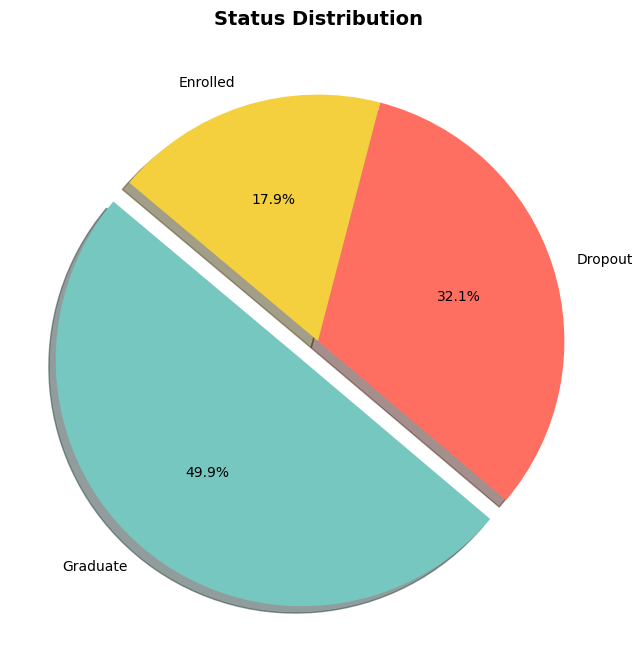

In [15]:
# Menghitung jumlah setiap status
status_counts = df['Status'].value_counts()

# Warna yang lebih bervariasi dan eksplosi
colors = ['#76c7c0', '#ff6f61',  '#f4d03f']
explode = [0.1, 0, 0]  # Membuat slice pertama (misalnya, status pertama) sedikit meledak keluar

# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    shadow=True,

)
plt.title('Status Distribution', fontsize=14, fontweight='bold')
plt.show()


Insight:  
- **Student graduate** mendominasi lebih dari setengah dengan angka mencapai **49.9%**, menunjukkan mayoritas mahasiswa berhasil menyelesaikan studi mereka.  
- **Student dropout** mencapai **32.1%**, yang mengindikasikan hampir 4 dari 10 mahasiswa tidak menyelesaikan pendidikan mereka.  
- **student enroll** mencapai 17.9%
- Perbandingan ini menunjukkan adanya tantangan yang signifikan dalam mempertahankan mahasiswa hingga lulus, sehingga dapat menjadi fokus analisis lebih lanjut untuk mengidentifikasi faktor-faktor penyebab dropout dan strategi untuk meningkatkannya.

In [16]:
categorical_columns = [
    'Marital_status', 'Application_mode', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification',
    'Nacionality','Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation','Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International'
]

unavariate analysis

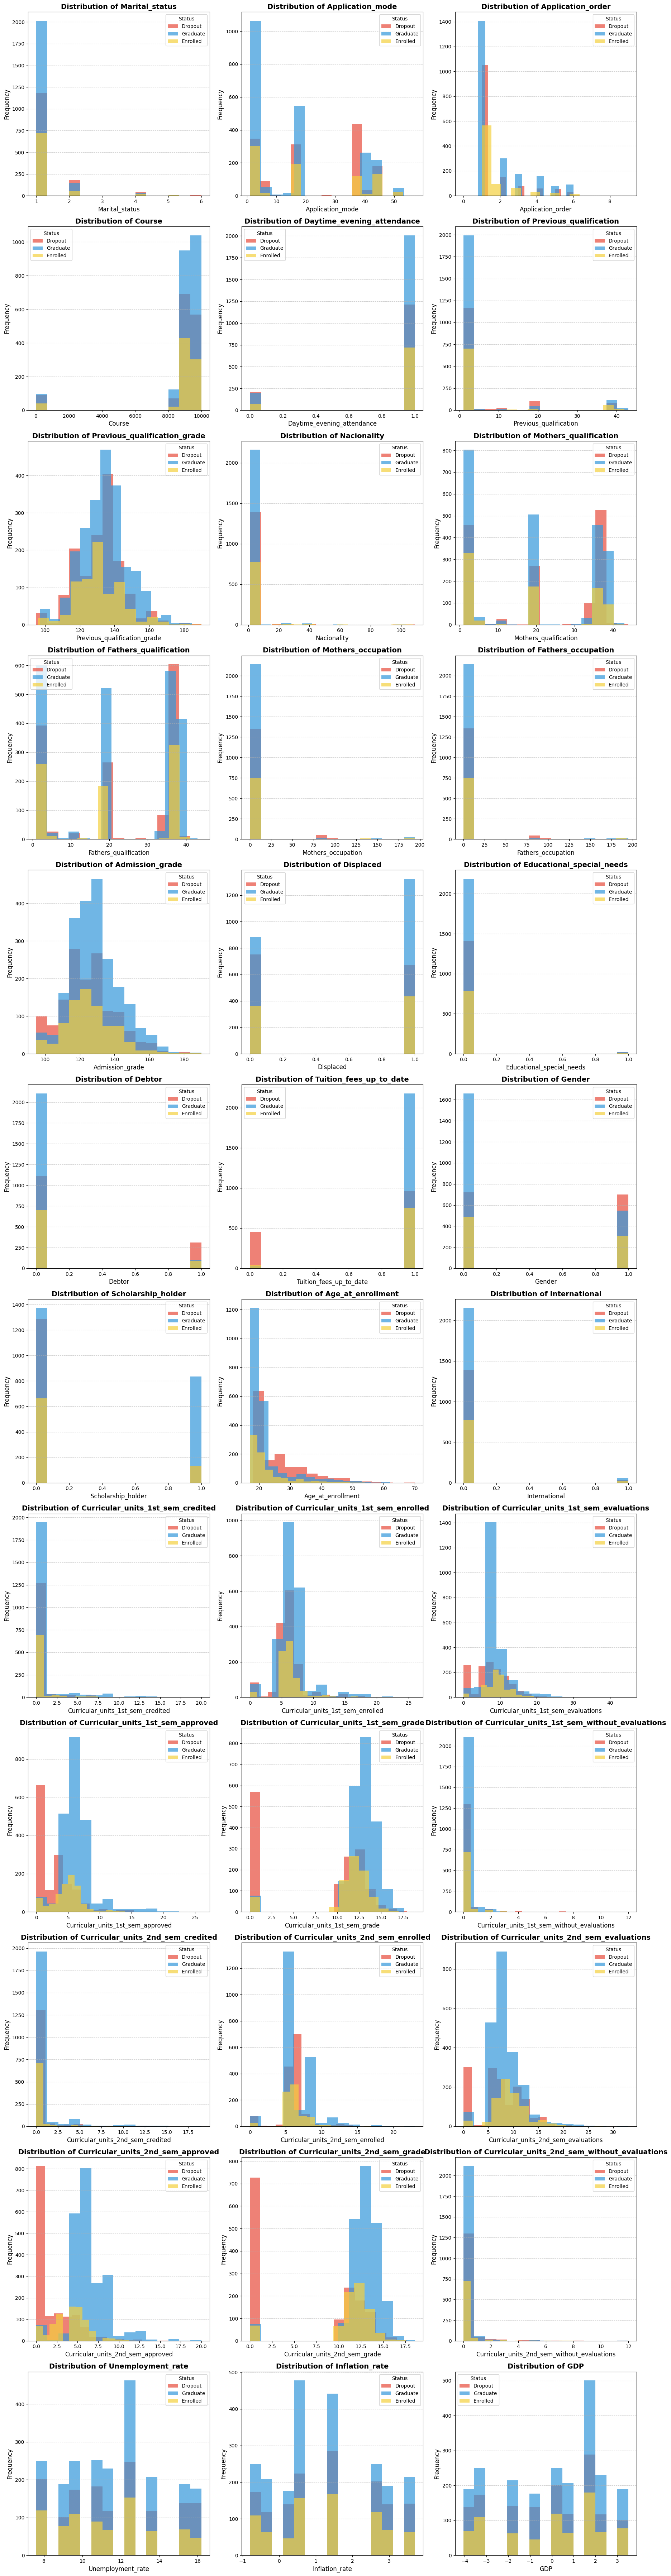

In [17]:
# Identify numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Define colors for all statuses
colors = {'Graduate': '#3498db', 'Dropout': '#e74c3c', 'Enrolled': '#f4d03f'} # Added color for 'Enrolled'

# Jumlah kolom untuk grid subplot
num_cols = 3
num_rows = -(-len(numeric_columns) // num_cols)  # Pembagian pembulatan ke atas

# Membuat subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()

# Loop melalui setiap kolom numerik
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    for status in df['Status'].unique():
        subset = df[df['Status'] == status]
        ax.hist(subset[column], bins=15, alpha=0.7, label=status, color=colors.get(status, '#95a5a6')) # Get color or default if not found
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    ax.legend(title='Status', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Multivariate analysis

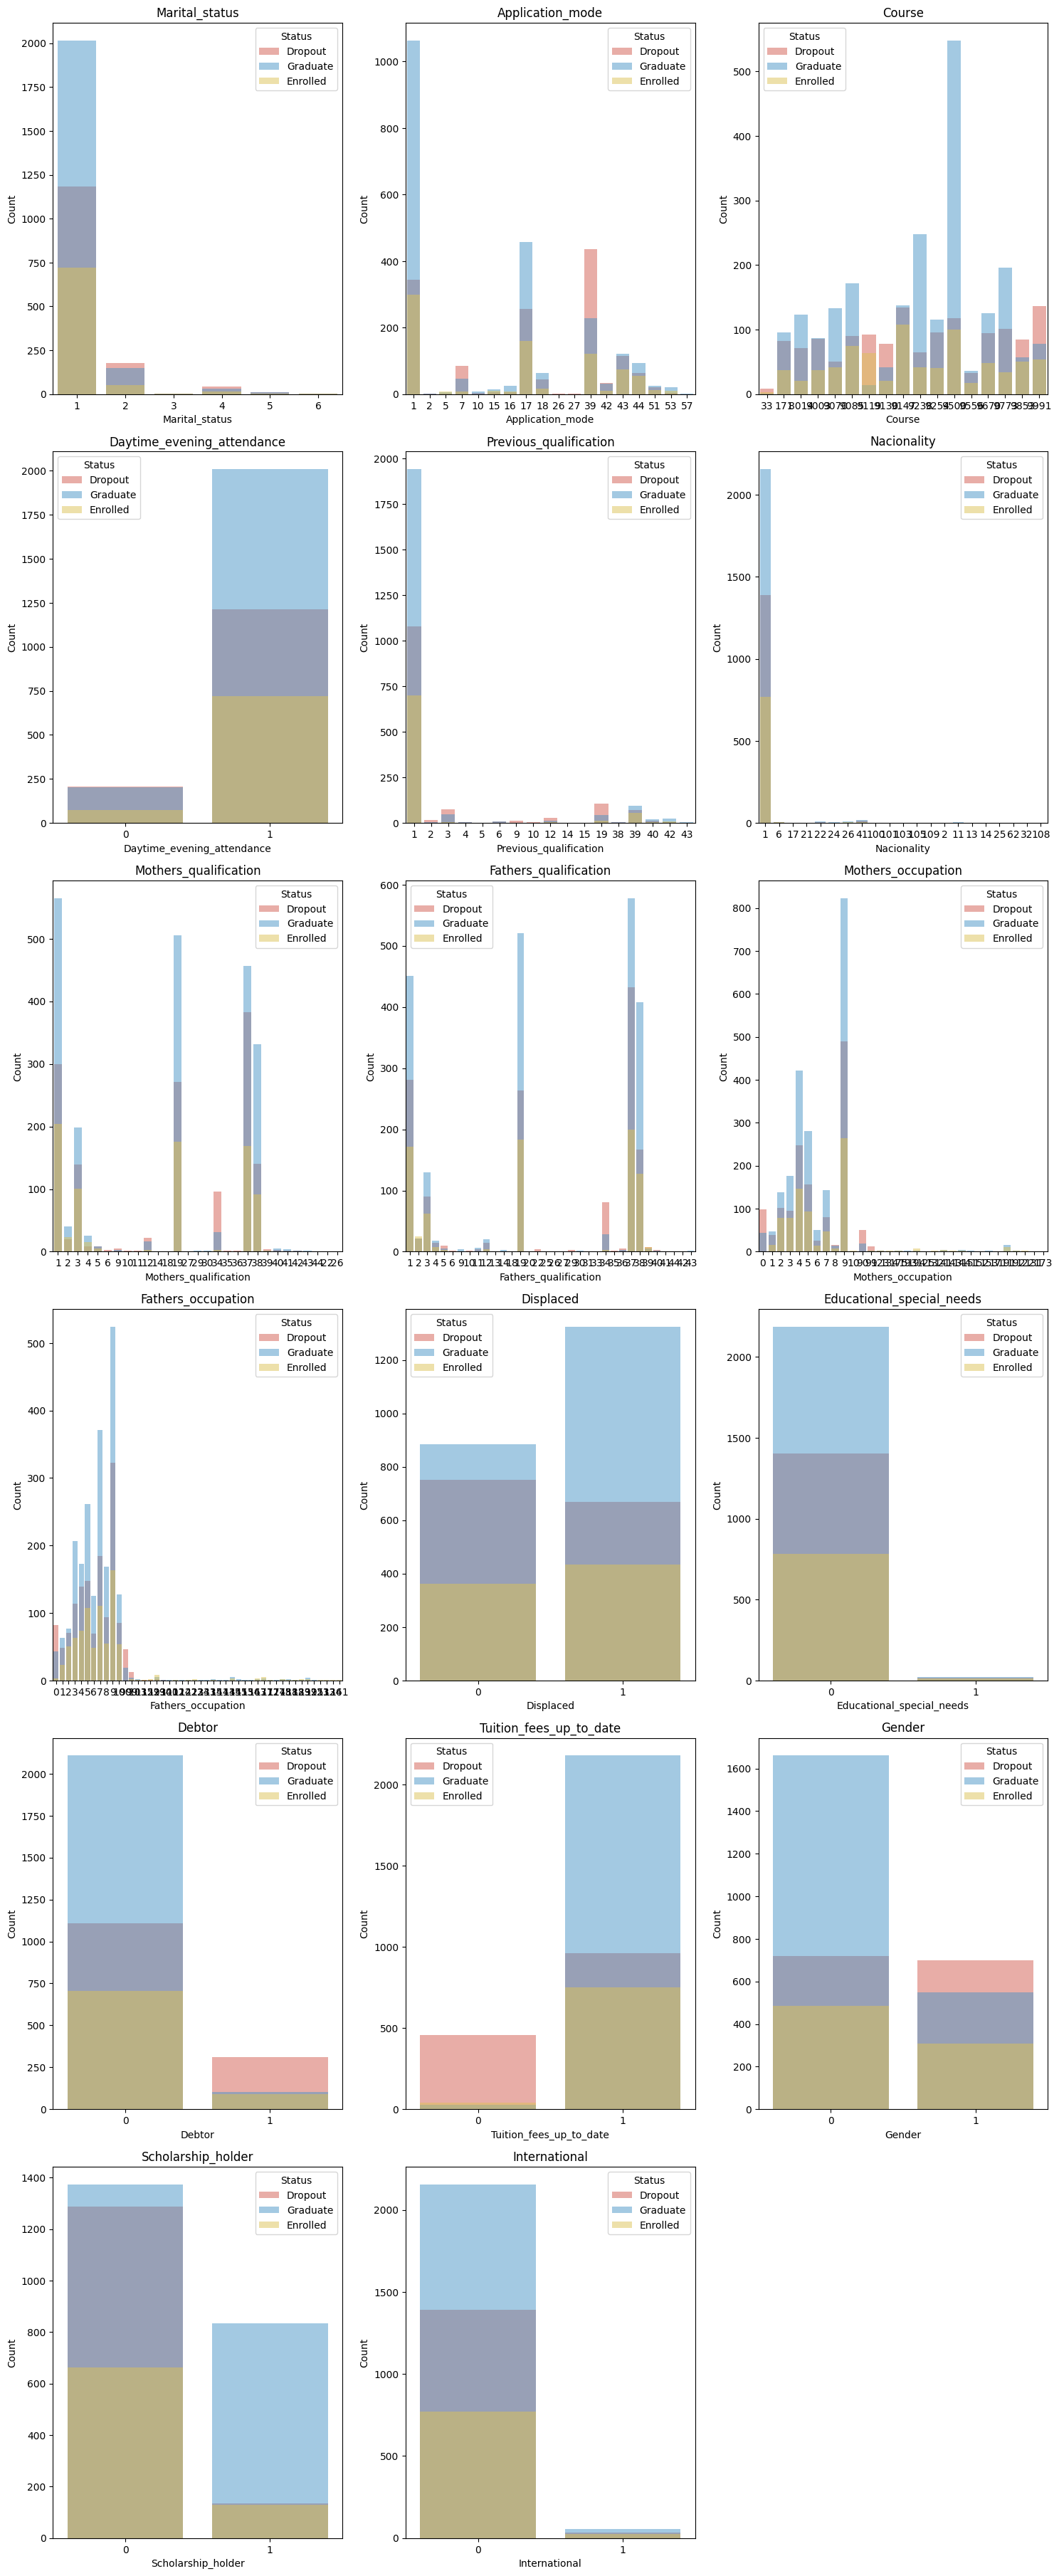

In [18]:
# Membuat palet warna kustom
colors = {'Graduate': '#3498db', 'Dropout': '#e74c3c', 'Enrolled': '#f4d03f'} # Added color for 'Enrolled'

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop melalui setiap kolom kategorikal
for i, column in enumerate(categorical_columns):
    for status in df['Status'].unique():
        subset = df[df['Status'] == status]
        ax = axes[i]
        sns.countplot(x=column, data=subset, hue='Status',alpha=0.5, palette=colors, ax=ax) # Use the updated colors dictionary
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'{column}')
        ax.legend(title='Status')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Cek korelasi antar fitur

In [19]:
df.corr(numeric_only = True)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Marital_status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application_mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application_order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime_evening_attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous_qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous_qualification_grade,-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mothers_qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045440,-0.011026,-0.036157,0.003183,

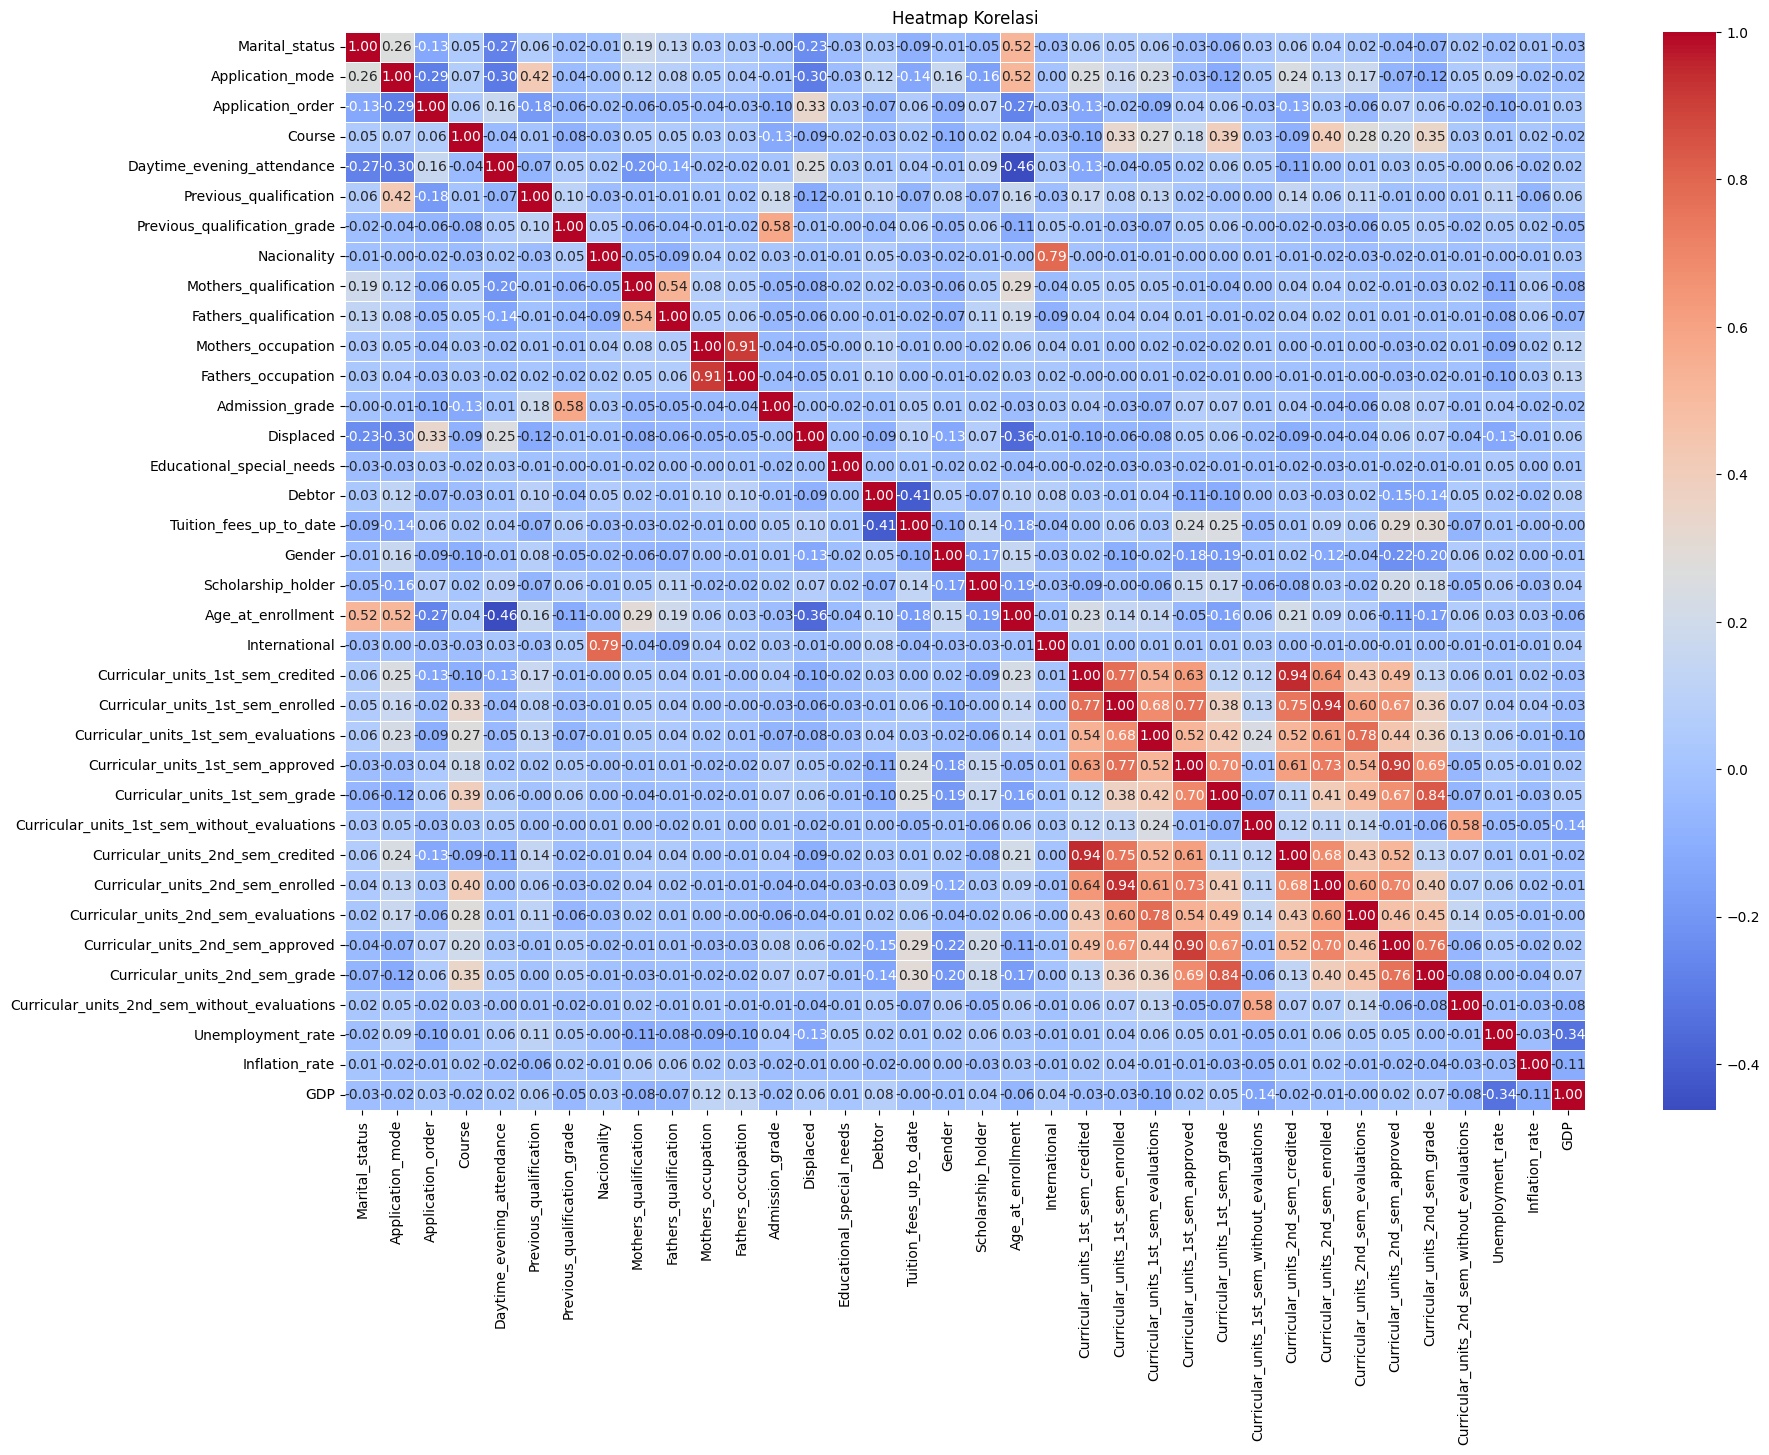

In [20]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### Deskripsi dan kemungkinan hasil plot:

- Marital_status dan Age_at_enrollment (0.522717):
Terdapat korelasi positif yang kuat antara status perkawinan dan usia pada saat pendaftaran. Ini menunjukkan bahwa semakin tua seseorang saat mendaftar, semakin besar kemungkinan mereka sudah menikah.

- Application_mode dan Age_at_enrollment (0.516243):
Terdapat korelasi positif yang kuat antara mode aplikasi dan usia pada saat pendaftaran. Ini bisa menunjukkan bahwa mode aplikasi tertentu lebih sering digunakan oleh individu yang lebih tua.

- Admission_grade dan Previous_qualification_grade (0.580444):
Terdapat korelasi positif yang kuat antara nilai masuk dan nilai kualifikasi sebelumnya. Ini menunjukkan bahwa siswa dengan nilai kualifikasi sebelumnya yang lebih tinggi cenderung memiliki nilai masuk yang lebih tinggi.

- Curricular_units_1st_sem_approved dan Curricular_units_1st_sem_grade (0.696113):
Terdapat korelasi positif yang kuat antara unit kurikulum yang disetujui di semester pertama dan nilai yang diperoleh di semester tersebut. Ini menunjukkan bahwa siswa yang mendapatkan lebih banyak unit yang disetujui cenderung memiliki nilai yang lebih tinggi.


### **Kesimpulan Potensial:**
- **Faktor Akademik Dominan**:
  - Performa akademik pada semester pertama dan kedua, seperti nilai dan jumlah mata kuliah yang diambil atau diselesaikan, sangat memengaruhi kemungkinan kelulusan mahasiswa.
  
- **Faktor Eksternal Kurang Relevan**:
  - Faktor ekonomi makro (seperti inflasi dan GDP) tampaknya tidak memberikan pengaruh langsung terhadap kelulusan (*Status*).

- **Penggunaan untuk Prediksi**:
  - Fitur dengan korelasi kuat terhadap `Status` (misalnya, `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`, dan fitur-fitur lain terkait *Curricular units*) dapat dijadikan prioritas dalam model prediktif untuk menentukan kemungkinan kelulusan mahasiswa.





### Cek Pasangan Fitur dengan korelasi di atas 0.7

In [21]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr().abs()

high_corr_pairs = (correlation_matrix > 0.7) & (correlation_matrix < 1)
high_corr_indices = np.where(high_corr_pairs)
high_corr_columns = [(numeric_columns[i], numeric_columns[j]) for i, j in zip(*high_corr_indices) if i < j]

high_corr_columns

[('Nacionality', 'International'),
 ('Mothers_occupation', 'Fathers_occupation'),
 ('Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled'),
 ('Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited'),
 ('Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved'),
 ('Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_credited'),
 ('Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled'),
 ('Curricular_units_1st_sem_evaluations',
  'Curricular_units_2nd_sem_evaluations'),
 ('Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_enrolled'),
 ('Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved'),
 ('Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade'),
 ('Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved'),
 ('Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade')]

Hasil analisis menunjukkan beberapa pasangan fitur dengan korelasi tinggi (di atas 0.7). Korelasi tinggi ditemukan antara kebangsaan dan status internasional, pekerjaan ibu dan ayah, serta berbagai metrik akademik seperti jumlah mata kuliah yang dikreditkan dan didaftarkan pada semester pertama dan kedua. Hubungan kuat ini menunjukkan bahwa performa akademik mahasiswa cenderung konsisten antar semester dan atribut demografis tertentu memiliki pola yang mirip dalam satu keluarga.

 membuat kolom baru berdasarkan nilai unik dalam kolom "Status". Nama kolom baru akan menjadi "Status_Graduate", "Status_Dropout", dan "Status_Enrolled".

In [22]:
status_dummies = pd.get_dummies(df['Status'])
status_dummies.columns = ['Status_' + status for status in status_dummies.columns]
df = pd.concat([df, status_dummies], axis=1)

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_Dropout,Status_Enrolled,Status_Graduate
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,True,False,False
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,False,False,True
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,True,False,False
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,False,False,True
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,False,False,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Cek Korelasi antara fitur-fitur dengan kolom Status_Dropout, Status_Enrolled dan Status_Graduate

In [24]:
target_columns = ['Status_Dropout', 'Status_Enrolled', 'Status_Graduate']

for target_column in target_columns:

    numeric_columns = df.select_dtypes(include=np.number).columns

    correlation_with_target = df[numeric_columns].corrwith(df[target_column])

    sorted_correlation = correlation_with_target.sort_values(ascending=False)

    print("Korelasi antara fitur-fitur dan kolom target", target_column + ":")
    print(sorted_correlation)
    print("\n")

Korelasi antara fitur-fitur dan kolom target Status_Dropout:
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Application_mode                                0.198458
Marital_status                                  0.093712
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Inflation_rate                                  0.027826
Fathers_qualification                           0.018295
Unemployment_rate                               0.012980
Nacionality                                     0.008346
Educational_special_needs                       0.002806
International                                  -0.010360
Mothers_occupation                             -0.021999
Fathers_occupation         

## Deskripsi kemungkinan dari hasil korelasi :

### Korelasi dengan Status_Dropout
- **Fitur dengan korelasi positif tertinggi**:
  - `Age_at_enrollment` (0.254): Usia saat mendaftar memiliki korelasi positif, artinya semakin tua usia siswa saat mendaftar, semakin besar kemungkinan mereka untuk dropout.
  - `Debtor` (0.229): Siswa yang memiliki utang memiliki korelasi positif dengan dropout.
  - `Gender` (0.204): Gender juga menunjukkan korelasi, mungkin menunjukkan perbedaan tingkat dropout antara laki-laki dan perempuan.
  - `Application_mode` (0.198): Mode aplikasi menunjukkan korelasi dengan dropout.
  
- **Fitur dengan korelasi negatif tertinggi**:
  - `Curricular_units_2nd_sem_grade` (-0.572): Nilai mata kuliah semester 2 memiliki korelasi negatif kuat, menunjukkan bahwa nilai yang lebih baik mengurangi kemungkinan dropout.
  - `Curricular_units_2nd_sem_approved` (-0.570): Mata kuliah yang disetujui pada semester 2 juga memiliki korelasi negatif kuat dengan dropout.
  - `Curricular_units_1st_sem_grade` (-0.481) dan `Curricular_units_1st_sem_approved` (-0.479): Nilai dan mata kuliah yang disetujui pada semester 1 juga berperan penting dalam mengurangi kemungkinan dropout.
  - `Tuition_fees_up_to_date` (-0.429): Membayar biaya kuliah tepat waktu berkorelasi negatif, menunjukkan bahwa keteraturan dalam pembayaran mengurangi kemungkinan dropout.

### Korelasi dengan Status_Enrolled
- **Fitur dengan korelasi positif tertinggi**:
  - `Curricular_units_2nd_sem_evaluations` (0.163): Evaluasi mata kuliah semester 2 memiliki korelasi positif, menunjukkan evaluasi yang lebih banyak terkait dengan status enrolled.
  - `Curricular_units_1st_sem_evaluations` (0.117): Evaluasi pada semester 1 juga menunjukkan korelasi positif.
  - `Tuition_fees_up_to_date` (0.096): Pembayaran biaya kuliah tepat waktu menunjukkan korelasi positif.
  - `Curricular_units_2nd_sem_grade` (0.080): Nilai mata kuliah semester 2 menunjukkan korelasi positif.

- **Fitur dengan korelasi negatif tertinggi**:
  - `Scholarship_holder` (-0.092): Pemegang beasiswa memiliki korelasi negatif, mungkin menunjukkan bahwa pemegang beasiswa cenderung memiliki status graduate daripada enrolled.
  - `Curricular_units_2nd_sem_enrolled` (-0.063) dan `Curricular_units_1st_sem_approved` (-0.059): Mata kuliah yang terdaftar atau disetujui pada semester 1 dan 2 menunjukkan korelasi negatif.
  - `Age_at_enrollment` (-0.055): Usia saat mendaftar memiliki korelasi negatif dengan status enrolled, mungkin menunjukkan bahwa siswa yang lebih tua lebih cenderung dropout atau graduate.

### Korelasi dengan Status_Graduate
- **Fitur dengan korelasi positif tertinggi**:
  - `Curricular_units_2nd_sem_approved` (0.577): Mata kuliah yang disetujui pada semester 2 memiliki korelasi positif kuat, menunjukkan bahwa lebih banyak mata kuliah yang disetujui meningkatkan kemungkinan graduate.
  - `Curricular_units_1st_sem_approved` (0.492): Mata kuliah yang disetujui pada semester 1 juga menunjukkan korelasi positif yang kuat.
  - `Curricular_units_2nd_sem_grade` (0.473) dan `Curricular_units_1st_sem_grade` (0.413): Nilai mata kuliah semester 1 dan 2 memiliki korelasi positif.
  - `Tuition_fees_up_to_date` (0.327): Pembayaran biaya kuliah tepat waktu menunjukkan korelasi positif yang cukup signifikan.

- **Fitur dengan korelasi negatif tertinggi**:
  - `Age_at_enrollment` (-0.195): Usia saat mendaftar memiliki korelasi negatif, menunjukkan bahwa siswa yang lebih muda lebih mungkin untuk graduate.
  - `Application_mode` (-0.209) dan `Debtor` (-0.214): Mode aplikasi dan status debitur menunjukkan korelasi negatif dengan status graduate.
  - `Gender` (-0.217): Gender juga menunjukkan korelasi negatif, mungkin menunjukkan perbedaan tingkat graduate antara laki-laki dan perempuan.

### Kesimpulan
- **Untuk Status_Dropout**, fitur yang paling berpengaruh adalah Usia saat mendaftar, status debitur, gender dan mode aplikasi.
- **Untuk Status_Enrolled**, evaluasi mata kuliah dan pembayaran biaya kuliah tepat waktu memiliki korelasi positif, sementara pemegang beasiswa dan usia saat mendaftar menunjukkan korelasi negatif.
- **Untuk Status_Graduate**, persetujuan dan nilai mata kuliah, serta pembayaran biaya kuliah tepat waktu adalah faktor yang paling berpengaruh positif. Usia saat mendaftar, mode aplikasi, dan status debitur menunjukkan korelasi negatif.

## Analisis akan di fokuskan ke fitur dengan korelasi tertinggi dengan Stastus Dropout

yaitu fitur:
 - `Age_at_enrollment`
 - `Debtor`
 - `Gender`
 - `Application_mode`

### Analisis Status Dropout berdasarkan Usia saat Pendaftaran

Mengubah kolom 'Status' menjadi numerik

In [25]:
status_mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
df['Status'] = df['Status'].map(status_mapping)

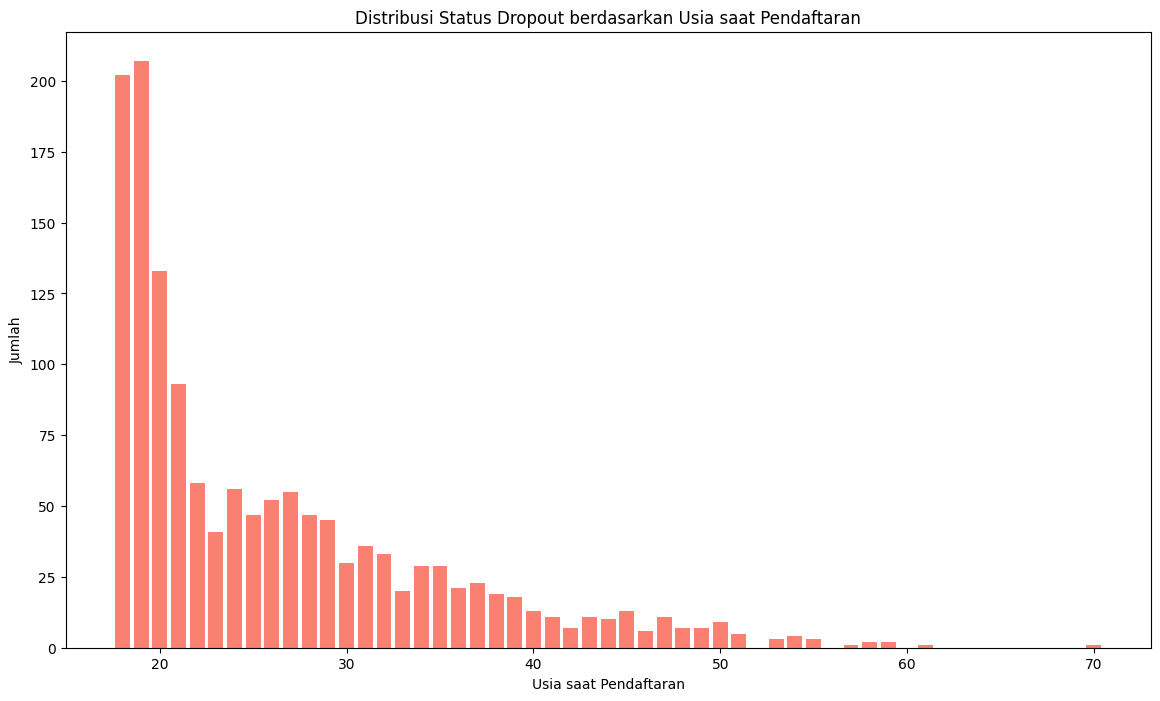

Distribusi dan Persentase Status Dropout berdasarkan Usia saat Pendaftaran:
                   Jumlah_Dropout  Jumlah_Total  Persentase_Dropout
Age_at_enrollment                                                  
17                            0.0             5            0.000000
18                          202.0          1036           19.498069
19                          207.0           911           22.722283
20                          133.0           599           22.203673
21                           93.0           322           28.881988
22                           58.0           174           33.333333
23                           41.0           108           37.962963
24                           56.0           131           42.748092
25                           47.0            93           50.537634
26                           52.0            94           55.319149
27                           55.0            91           60.439560
28                           47.0       

In [26]:
jumlah_dropout_usia = df[df['Status'] == 1].groupby('Age_at_enrollment').size()
jumlah_total_usia = df.groupby('Age_at_enrollment').size()

persentase_dropout_usia = (jumlah_dropout_usia / jumlah_total_usia) * 100

statistik_dropout_usia = pd.DataFrame({
    'Jumlah_Dropout': jumlah_dropout_usia,
    'Jumlah_Total': jumlah_total_usia,
    'Persentase_Dropout': persentase_dropout_usia
}).fillna(0)

plt.figure(figsize=(14, 8))

plt.bar(jumlah_dropout_usia.index, jumlah_dropout_usia, color='salmon')

plt.xlabel('Usia saat Pendaftaran')
plt.ylabel('Jumlah')
plt.title('Distribusi Status Dropout berdasarkan Usia saat Pendaftaran')

plt.show()

print("Distribusi dan Persentase Status Dropout berdasarkan Usia saat Pendaftaran:")
print(statistik_dropout_usia)

In [27]:
df_above_21 = df[df['Age_at_enrollment'] > 21]

fathers_occupation_dropout = df_above_21[df_above_21['Status'] == 1]['Fathers_occupation'].value_counts()
fathers_occupation_total = df_above_21['Fathers_occupation'].value_counts()
fathers_occupation_df = pd.DataFrame({
    'Jumlah_Dropout': fathers_occupation_dropout,
    'Jumlah_Total': fathers_occupation_total,
    'Persentase_Dropout': (fathers_occupation_dropout / fathers_occupation_total * 100).round(2)
}).fillna(0).sort_values(by='Jumlah_Dropout', ascending=False)

print("Distribusi Status Dropout berdasarkan Pekerjaan Ayah untuk Usia di atas 21 Tahun:")
print(fathers_occupation_df)

mothers_occupation_dropout = df_above_21[df_above_21['Status'] == 1]['Mothers_occupation'].value_counts()
mothers_occupation_total = df_above_21['Mothers_occupation'].value_counts()
mothers_occupation_df = pd.DataFrame({
    'Jumlah_Dropout': mothers_occupation_dropout,
    'Jumlah_Total': mothers_occupation_total,
    'Persentase_Dropout': (mothers_occupation_dropout / mothers_occupation_total * 100).round(2)
}).fillna(0).sort_values(by='Jumlah_Dropout', ascending=False)

print("\nDistribusi Status Dropout berdasarkan Pekerjaan Ibu untuk Usia di atas 21 Tahun:")
print(mothers_occupation_df)

Distribusi Status Dropout berdasarkan Pekerjaan Ayah untuk Usia di atas 21 Tahun:
                    Jumlah_Dropout  Jumlah_Total  Persentase_Dropout
Fathers_occupation                                                  
9                            189.0           388               48.71
7                             88.0           182               48.35
4                             78.0           139               56.12
5                             68.0           140               48.57
0                             58.0            82               70.73
10                            53.0            98               54.08
6                             47.0           117               40.17
8                             47.0            90               52.22
3                             46.0           102               45.10
2                             40.0            80               50.00
90                            33.0            38               86.84
1                    

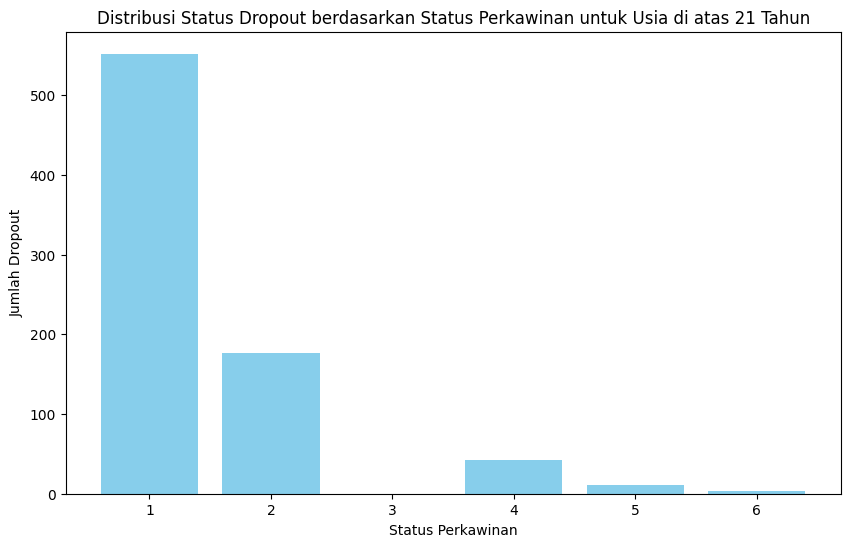

Distribusi Status Dropout berdasarkan Status Perkawinan untuk Usia di atas 21 Tahun:
                Jumlah_Dropout
Marital_status                
1                          552
2                          177
4                           42
5                           11
6                            4


In [28]:
dropout_above_21 = df[(df['Status'] == 1) & (df['Age_at_enrollment'] > 21 )]

jumlah_dropout_marital_status = dropout_above_21['Marital_status'].value_counts()

statistik_dropout_marital_status = pd.DataFrame({
    'Jumlah_Dropout': jumlah_dropout_marital_status
})

plt.figure(figsize=(10, 6))
plt.bar(jumlah_dropout_marital_status.index, jumlah_dropout_marital_status, color='skyblue')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah Dropout')
plt.title('Distribusi Status Dropout berdasarkan Status Perkawinan untuk Usia di atas 21 Tahun')
plt.show()

print("Distribusi Status Dropout berdasarkan Status Perkawinan untuk Usia di atas 21 Tahun:")
print(statistik_dropout_marital_status)

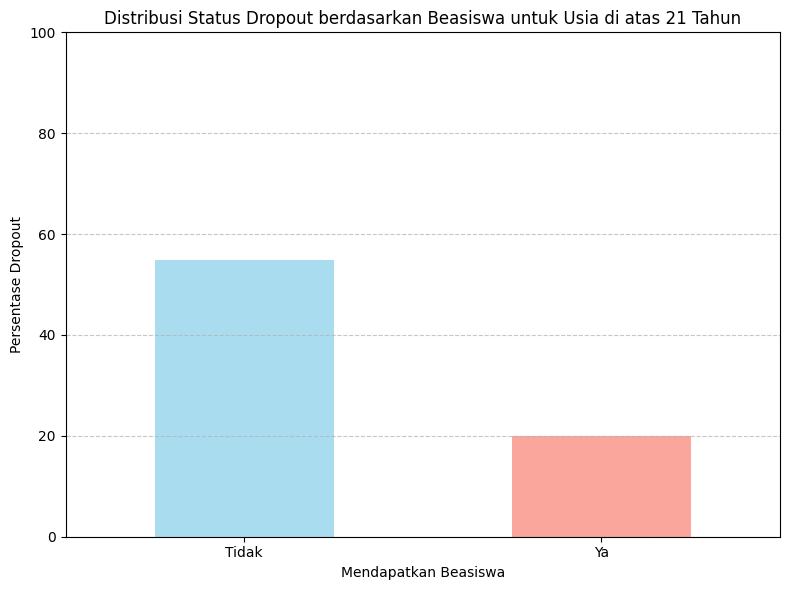

Scholarship_holder
0    54.959589
1    20.000000
Name: Status_Dropout, dtype: float64


In [29]:
df_above_21 = df[df['Age_at_enrollment'] > 21]

dropout_by_scholarship = df_above_21.groupby('Scholarship_holder')['Status_Dropout'].mean() * 100

plt.figure(figsize=(8, 6))
dropout_by_scholarship.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)

plt.title('Distribusi Status Dropout berdasarkan Beasiswa untuk Usia di atas 21 Tahun')
plt.xlabel('Mendapatkan Beasiswa')
plt.ylabel('Persentase Dropout')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
print(dropout_by_scholarship)

### Kesimpulan Analisis Status Dropout berdasarkan Usia saat Pendaftaran

1. **Usia Muda (17-20 Tahun):**
   - Tingkat dropout di antara mahasiswa yang mendaftar pada usia yang lebih muda (17-20 tahun) relatif rendah, dengan persentase dropout  pada usia 18 tahun (19.50%) dan sedikit meningkat pada usia 19 dan 20 tahun (masing-masing 22.72% dan 22.20%).

2. **Usia Menengah (21-30 Tahun):**
   - Terdapat peningkatan signifikan dalam persentase dropout pada kelompok usia ini. Misalnya, pada usia 21 tahun, persentase dropout mencapai 28.88%, dan terus meningkat hingga mencapai 68.18% pada usia 29 tahun.
   
3. **Usia Lebih Tua (31-50 Tahun):**
   - Kelompok usia ini menunjukkan tingkat dropout yang lebih tinggi secara konsisten. Sebagai contoh, pada usia 31 tahun, persentase dropout adalah 65.45%, dan tetap tinggi hingga usia 50 tahun.

4. **Usia Sangat Tua (51 Tahun ke Atas):**
   - Terdapat beberapa outlier pada usia ini, seperti pada usia 51 dan 70 tahun, di mana tingkat dropout mencapai 71.43% dan 100%, namun jumlah sampel pada usia ini sangat sedikit sehingga bisa dianggap tidak representatif.

### Rekomendasi Tindakan

Mengingat tingginya tingkat persentase dropout pada mahasiswa usia menengah, dan mayoritas dari mereka masih single dengan orang tua yang bekerja sebagai pekerja tidak terampil yang kemungkinan memiliki pendapatan rendah dan tidak menerima beasiswa, sehingga mahasiswa kemungkinan sambil bekerja jadi institusi bisa mempertimbangkan program-program seperti menawarkan kelas pada jadwal yang lebih fleksibel atau pembelajaran daring untuk menyesuaikan dengan jadwal kerja mahasiswa.


### Analisis untuk Status Dropout Berdasarkan Status Debitur

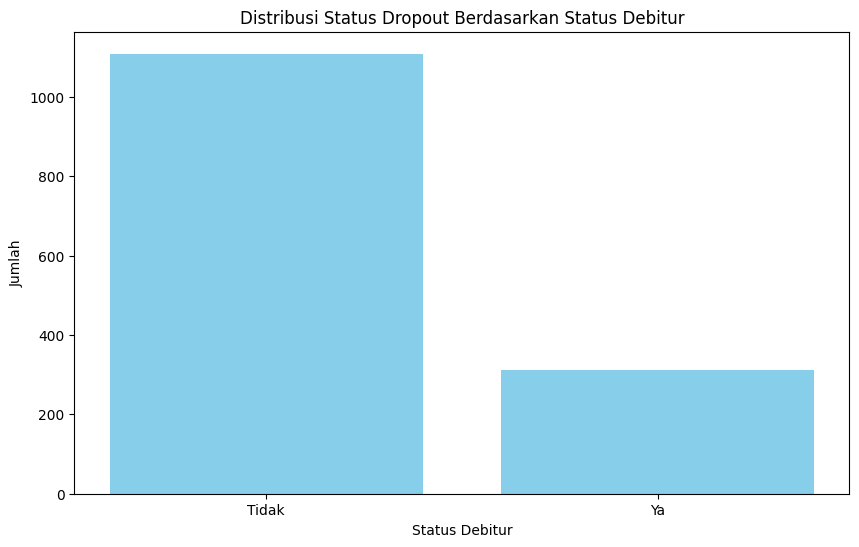


Distribusi dan Persentase Status Dropout Berdasarkan Status Debitur:
        Jumlah_Dropout  Jumlah_Total  Persentase_Dropout
Debtor                                                  
0                 1109          3921           28.283601
1                  312           503           62.027833


In [30]:
dropout_by_debtor = df[df['Status'] == 1].groupby('Debtor').size()
total_by_debtor = df.groupby('Debtor').size()

percentage_dropout_by_debtor = (dropout_by_debtor / total_by_debtor) * 100

dropout_stats_by_debtor = pd.DataFrame({
    'Jumlah_Dropout': dropout_by_debtor,
    'Jumlah_Total': total_by_debtor,
    'Persentase_Dropout': percentage_dropout_by_debtor
}).fillna(0)

plt.figure(figsize=(10, 6))

plt.bar(dropout_stats_by_debtor.index, dropout_stats_by_debtor['Jumlah_Dropout'], color='skyblue')

plt.xlabel('Status Debitur')
plt.ylabel('Jumlah')
plt.title('Distribusi Status Dropout Berdasarkan Status Debitur')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
plt.show()

print("\nDistribusi dan Persentase Status Dropout Berdasarkan Status Debitur:")
print(dropout_stats_by_debtor)

Analisis penyebab debitur yang dropout

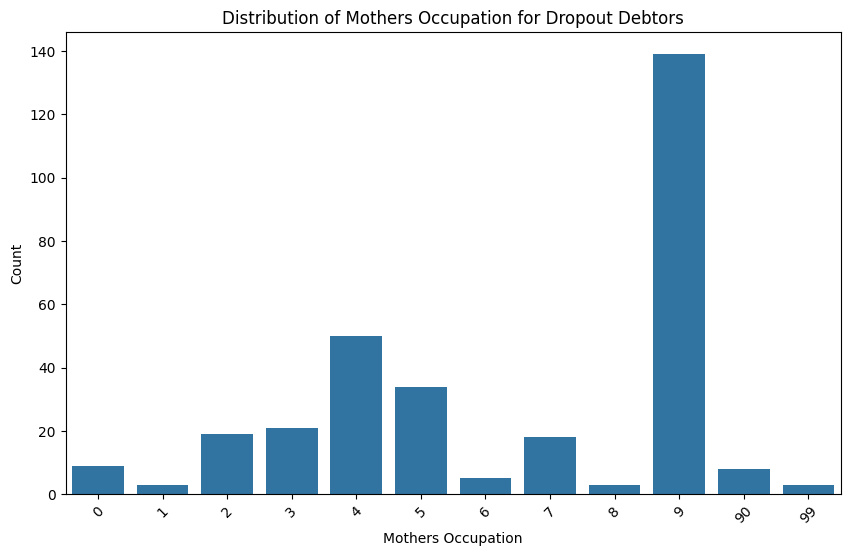

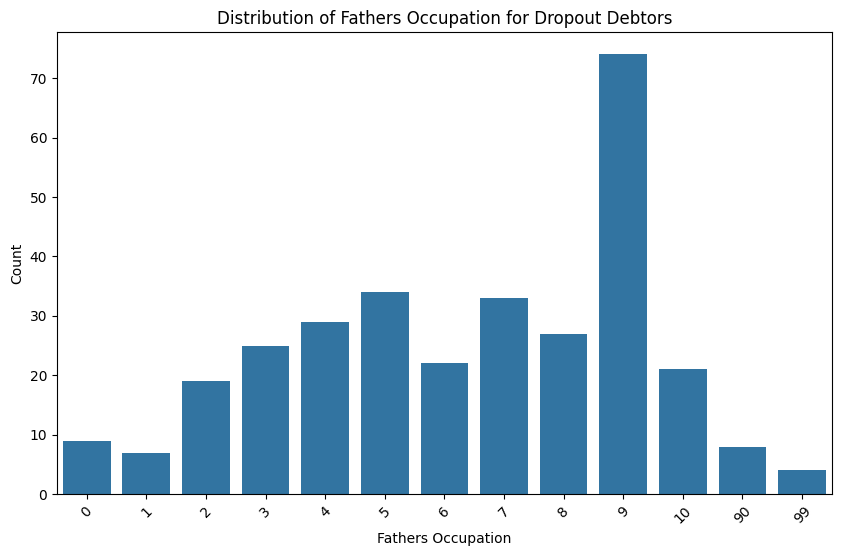

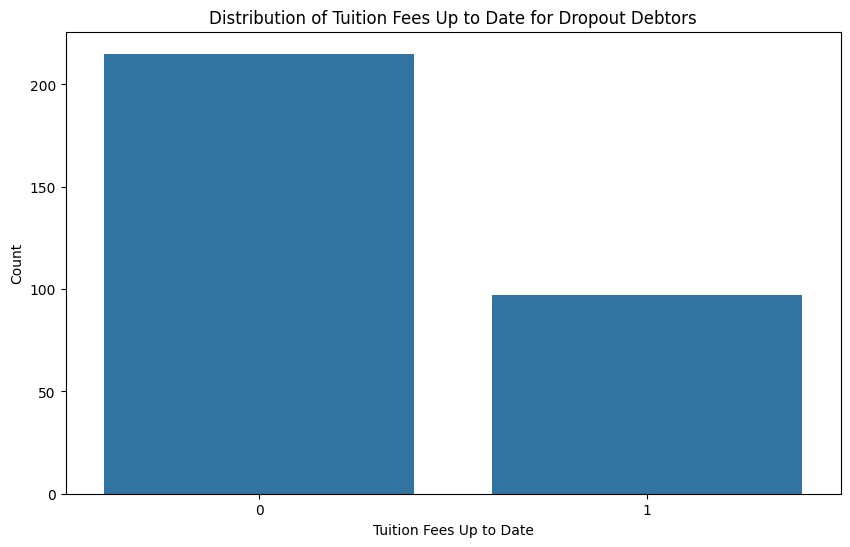

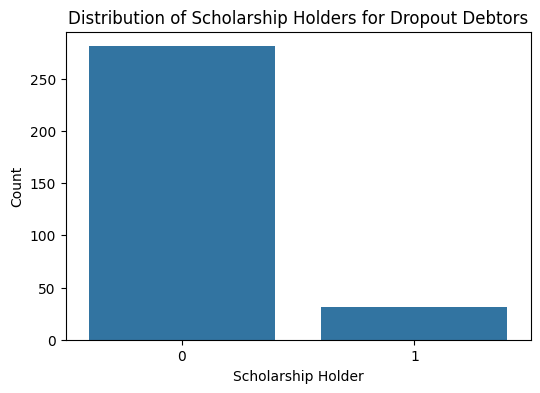

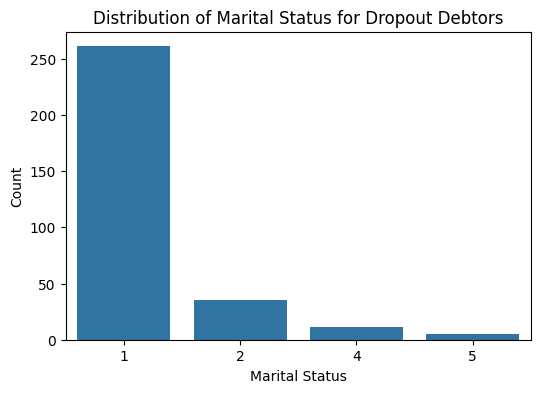

In [31]:
df_debitur_dropout = df[(df['Status'] == 1) & (df['Debtor'] == 1)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_debitur_dropout, x='Mothers_occupation')
plt.xlabel('Mothers Occupation')
plt.ylabel('Count')
plt.title('Distribution of Mothers Occupation for Dropout Debtors')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_debitur_dropout, x='Fathers_occupation')
plt.xlabel('Fathers Occupation')
plt.ylabel('Count')
plt.title('Distribution of Fathers Occupation for Dropout Debtors')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_debitur_dropout, x='Tuition_fees_up_to_date')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Count')
plt.title('Distribution of Tuition Fees Up to Date for Dropout Debtors')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_debitur_dropout, x='Scholarship_holder')
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.title('Distribution of Scholarship Holders for Dropout Debtors')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_debitur_dropout, x='Marital_status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status for Dropout Debtors')
plt.show()

mayoritas dari mereka memiliki orang tua dengan pekerjaan tidak terampil, tunggakan biaya kuliah dan tidak menerima beasiswa. Ini menyoroti masalah keuangan dan sosio-ekonomi yang mungkin memengaruhi keputusan mereka untuk keluar.

## Kesimpulan Analisis untuk Status Dropout Berdasarkan Status Debitur:
Di antara mahasiswa yang tidak memiliki utang, tingkat dropout adalah 28,28%, dan Mahasiswa yang memiliki utang menunjukkan tingkat dropout yang jauh lebih tinggi, yaitu 62,03%.

Berdasarkan analisis, mayoritas debitur yang dropout memiliki ibu dan ayah dengan pekerjaan tidak terampil yang menunjukkan latar belakang ekonomi yang kurang stabil. Sebagian besar dari mereka belum melakukan pembayaran uang kuliah dan tidak menerima beasiswa, mengindikasikan bahwa masalah keuangan adalah faktor utama dalam dropout.

## Rekomendasi Action:
Menyediakan program bantuan keuangan seperti beasiswa atau dalam bentuk bantuan finansial tambahan, seperti keringanan biaya kuliah bagi mahasiswa yang memiliki orang tua dengan pekerjaan tidak terampil yang menunjukkan latar belakang ekonomi yang kurang stabil. Ini dapat memungkinkan mereka untuk lebih fokus pada studi mereka dan mengurangi kemungkinan dropout.

### Analisis Distribusi Status Dropout Berdasarkan Gender

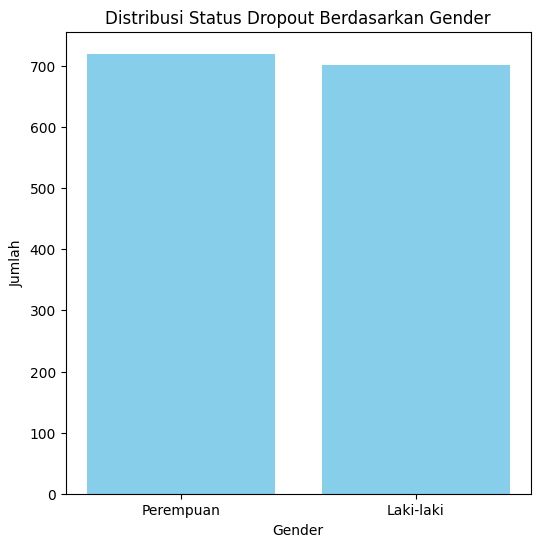

Distribusi dan Persentase Status Dropout Berdasarkan Gender:
        Jumlah_Dropout  Jumlah_Total  Persentase_Dropout
Gender                                                  
0                  720          2868           25.104603
1                  701          1556           45.051414


In [32]:
jumlah_dropout_gender = df[df['Status'] == 1].groupby('Gender').size()
jumlah_total_gender = df.groupby('Gender').size()

persentase_dropout_gender = (jumlah_dropout_gender / jumlah_total_gender) * 100

statistik_dropout_gender = pd.DataFrame({
    'Jumlah_Dropout': jumlah_dropout_gender,
    'Jumlah_Total': jumlah_total_gender,
    'Persentase_Dropout': persentase_dropout_gender
}).fillna(0)

plt.figure(figsize=(6, 6))

plt.bar(statistik_dropout_gender.index, statistik_dropout_gender['Jumlah_Dropout'], color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Distribusi Status Dropout Berdasarkan Gender')
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki'])

plt.show()

print("Distribusi dan Persentase Status Dropout Berdasarkan Gender:")
print(statistik_dropout_gender)

In [33]:
male_debtors = df[(df['Gender'] == 1) & (df['Debtor'] == 1)]
total_male_debtors = len(male_debtors)

dropout_male_debtors = len(male_debtors[male_debtors['Status'] == 1])

dropout_percentage_male_debtors = (dropout_male_debtors / total_male_debtors) * 100

print("Jumlah mahasiswa laki-laki yang merupakan debitur:", total_male_debtors)
print("Jumlah mahasiswa laki-laki yang merupakan debitur dan dropout:", dropout_male_debtors)
print("Persentase dropout bagi mahasiswa laki-laki yang merupakan debitur:", dropout_percentage_male_debtors)

Jumlah mahasiswa laki-laki yang merupakan debitur: 213
Jumlah mahasiswa laki-laki yang merupakan debitur dan dropout: 149
Persentase dropout bagi mahasiswa laki-laki yang merupakan debitur: 69.95305164319248


## Kesimpulan Analisis Distribusi Status Dropout Berdasarkan Gender
Berdasarkan distribusi dan persentase status dropout berdasarkan gender, terlihat bahwa persentase dropout pada mahasiswa laki-laki (45.05%) jauh lebih tinggi daripada mahasiswa perempuan (25.10%). Meskipun jumlah total mahasiswa perempuan lebih tinggi, mungkin dikarenakan masalah ekonomi karena presentase dropout bagi mahasiswa laki-laki yang merupakan debitur mencapai 69%.

### Analisis Status Dropout Berdasarkan Mode Aplikasi

Mengganti nilai dalam kolom 'Application_mode' dengan label yang sesuai deskripsi agar lebih mudah dipahami

In [34]:
mapping_application_mode = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2 (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

df['Application_mode'] = df['Application_mode'].map(mapping_application_mode)
df.Application_mode.value_counts()

,count
Application_mode,
1st phase - general contingent,1708
2nd phase - general contingent,872
Over 23 years old,785
Change of course,312
Technological specialization diploma holders,213
Holders of other higher courses,139
3rd phase - general contingent,124
Transfer,77
Change of institution/course,59


Cek Distribusi Status Dropout Berdasarkan Mode Aplikasi

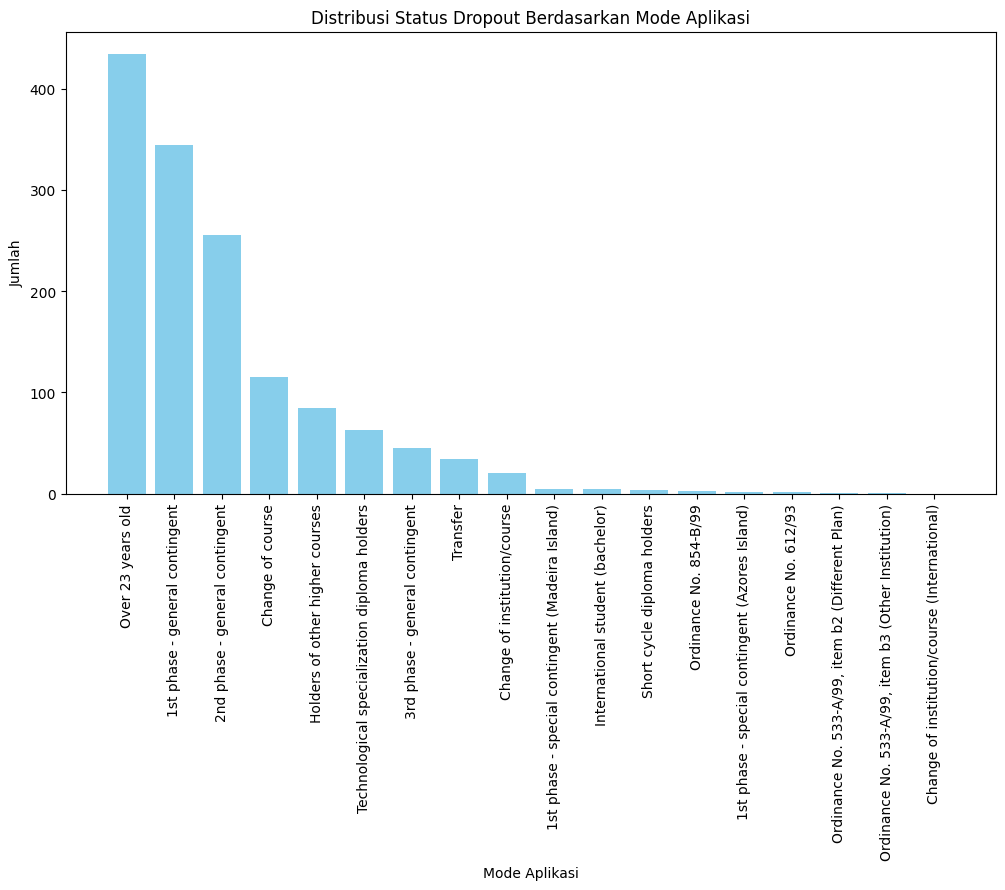

Distribusi Status Dropout Berdasarkan Mode Aplikasi (diurutkan dari yang terbanyak):
                                                    Jumlah_Dropout  Jumlah_Total  Persentase_Dropout
Application_mode                                                                                    
Over 23 years old                                            435.0           785           55.414013
1st phase - general contingent                               345.0          1708           20.199063
2nd phase - general contingent                               256.0           872           29.357798
Change of course                                             115.0           312           36.858974
Holders of other higher courses                               85.0           139           61.151079
Technological specialization diploma holders                  63.0           213           29.577465
3rd phase - general contingent                                45.0           124           36.290323
Transf

In [35]:
jumlah_dropout_application = df[df['Status'] == 1].groupby('Application_mode').size()
jumlah_total_application = df.groupby('Application_mode').size()

persentase_dropout_application = (jumlah_dropout_application / jumlah_total_application) * 100

statistik_dropout_application = pd.DataFrame({
    'Jumlah_Dropout': jumlah_dropout_application,
    'Jumlah_Total': jumlah_total_application,
    'Persentase_Dropout': persentase_dropout_application
}).fillna(0)

statistik_dropout_application_sorted = statistik_dropout_application.sort_values(by='Jumlah_Dropout', ascending=False)

plt.figure(figsize=(12, 6))

plt.bar(statistik_dropout_application_sorted.index, statistik_dropout_application_sorted['Jumlah_Dropout'], color='skyblue')

plt.xlabel('Mode Aplikasi')
plt.ylabel('Jumlah')
plt.title('Distribusi Status Dropout Berdasarkan Mode Aplikasi')
plt.xticks(rotation=90)

plt.show()

print("Distribusi Status Dropout Berdasarkan Mode Aplikasi (diurutkan dari yang terbanyak):")
print(statistik_dropout_application_sorted)

Distribusi status dropout berdasarkan mode aplikasi menunjukkan bahwa kategori "Over 23 years old" memiliki jumlah dropout terbanyak (435 dari 785 siswa) dengan persentase dropout sebesar 55.41% dan akan di analis lebih lanjut penyebab kemungkinan dropout.

### Analisis lebih lanjut penyebab Over 23 years old dropout  

Distribusi dari fitur Marital_status, Scholarship_holder, Debtor, Tuition_fees_up_to_date untuk Application_mode "Over 23 years old":

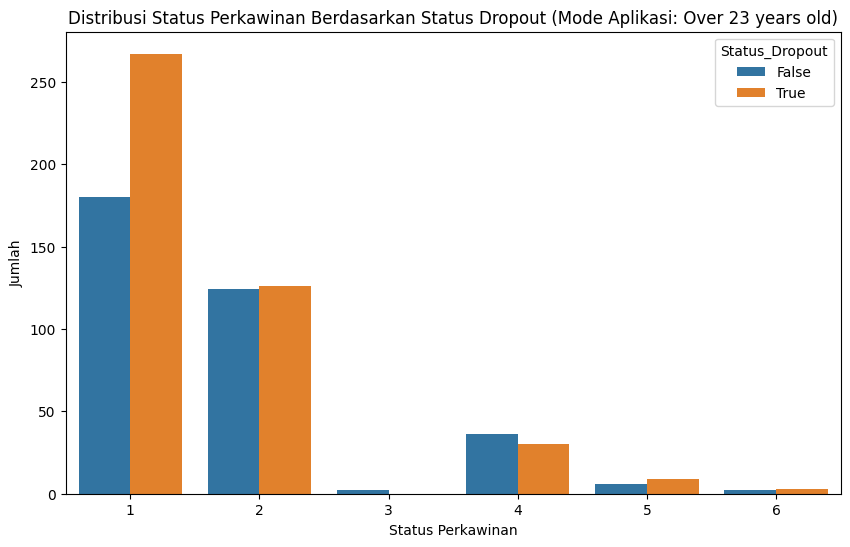

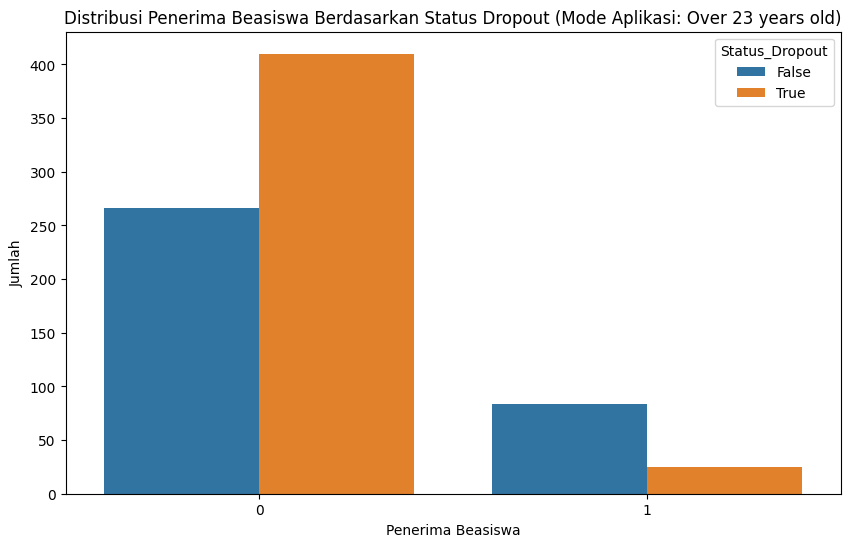

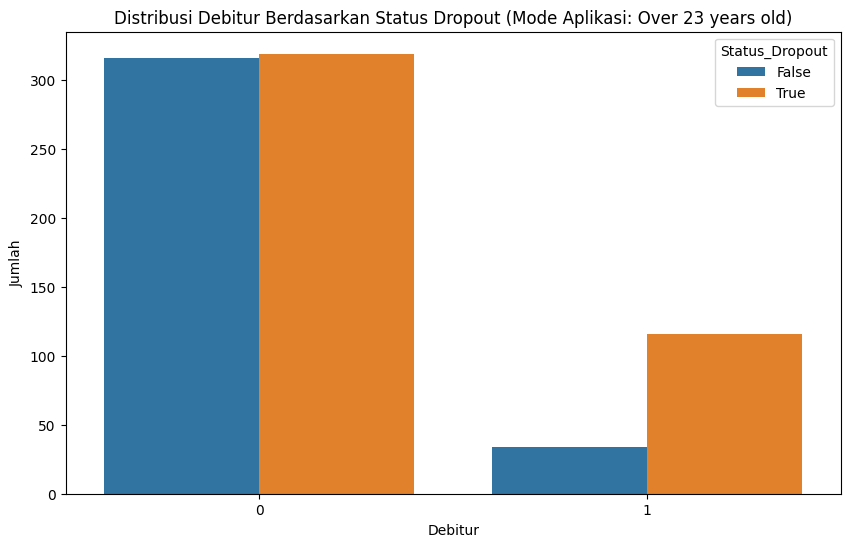

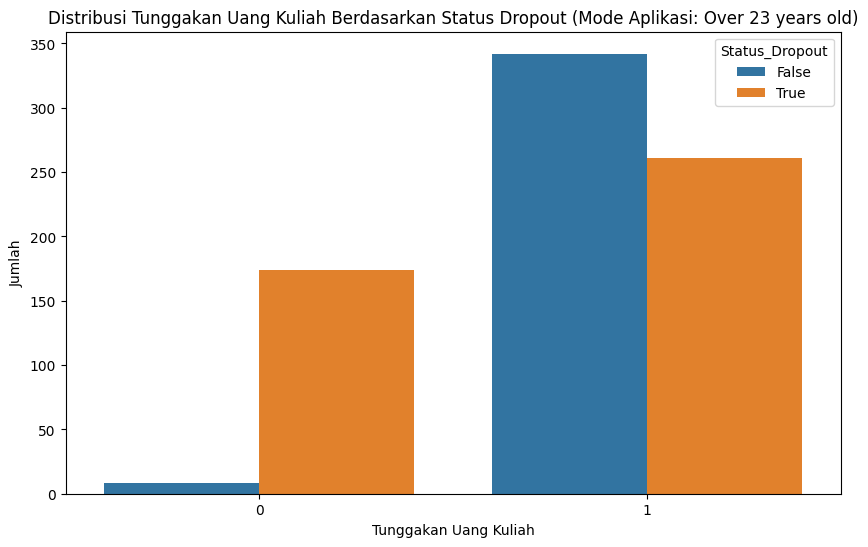

In [36]:
df_over_23_mode = df[df['Application_mode'] == "Over 23 years old"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_over_23_mode, x='Marital_status', hue='Status_Dropout')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah')
plt.title('Distribusi Status Perkawinan Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_over_23_mode, x='Scholarship_holder', hue='Status_Dropout')
plt.xlabel('Penerima Beasiswa')
plt.ylabel('Jumlah')
plt.title('Distribusi Penerima Beasiswa Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_over_23_mode, x='Debtor', hue='Status_Dropout')
plt.xlabel('Debitur')
plt.ylabel('Jumlah')
plt.title('Distribusi Debitur Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_over_23_mode, x='Tuition_fees_up_to_date', hue='Status_Dropout')
plt.xlabel('Tunggakan Uang Kuliah')
plt.ylabel('Jumlah')
plt.title('Distribusi Tunggakan Uang Kuliah Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

Status perkawinan merupakan faktor yang signifikan dalam tingkat dropout, dengan mahasiswa yang tidak menikah memiliki risiko dropout yang lebih tinggi. Selain itu, penerimaan beasiswa terbukti mengurangi risiko dropout, sementara menjadi debitur atau memiliki tunggakan uang kuliah meningkatkan kemungkinan mahasiswa untuk dropout.

Distribusi dari fitur Course, Displaced, International, Daytime_evening_attendance untuk Application_mode "Over 23 years old":

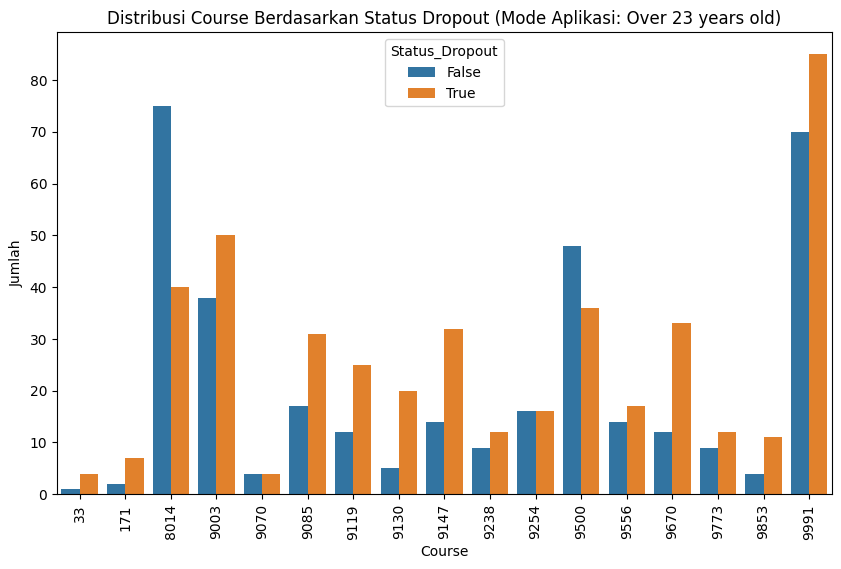

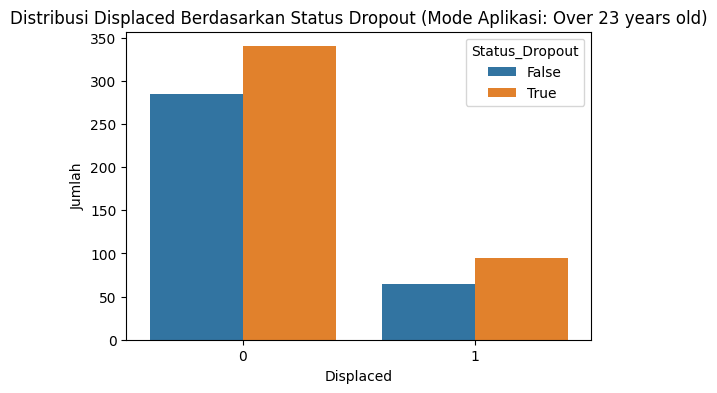

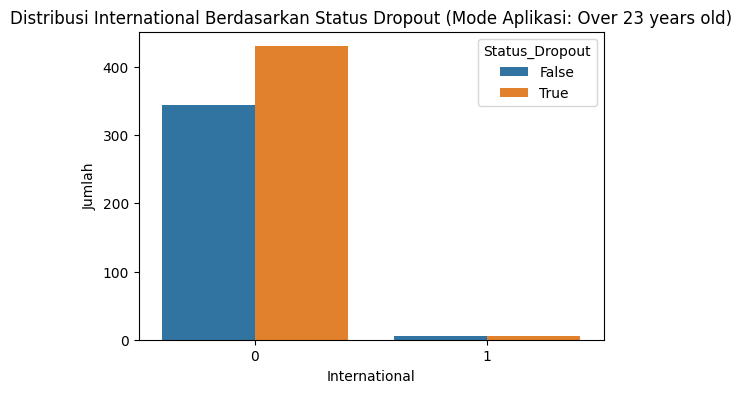

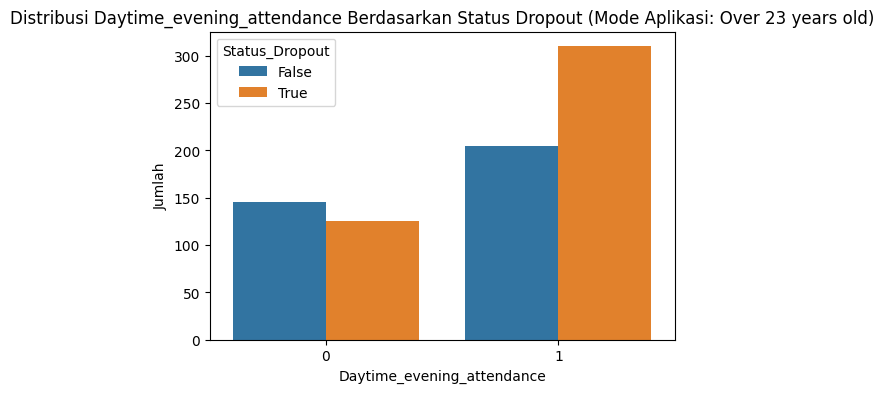

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_over_23_mode, x='Course', hue='Status_Dropout')
plt.xlabel('Course')
plt.ylabel('Jumlah')
plt.title('Distribusi Course Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_over_23_mode, x='Displaced', hue='Status_Dropout')
plt.xlabel('Displaced')
plt.ylabel('Jumlah')
plt.title('Distribusi Displaced Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_over_23_mode, x='International', hue='Status_Dropout')
plt.xlabel('International')
plt.ylabel('Jumlah')
plt.title('Distribusi International Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_over_23_mode, x='Daytime_evening_attendance', hue='Status_Dropout')
plt.xlabel('Daytime_evening_attendance')
plt.ylabel('Jumlah')
plt.title('Distribusi Daytime_evening_attendance Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

Distribusi Course menunjukkan bahwa kursus 9991 memiliki tingkat dropout yang paling tinggi, dengan 85 mahasiswa dari total 155 yang mendaftar mengalami dropout. Distribusi Displaced menunjukkan bahwa mahasiswa yang tidak terdampak memiliki jumlah dropout yang lebih tinggi dibandingkan dengan yang terdampak. Distribusi Daytime_evening_attendance menunjukkan bahwa mahasiswa yang menghadiri kelas pada siang hari memiliki jumlah dropout yang lebih tinggi dibandingkan dengan yang menghadiri kelas pada malam hari.

Performa Akademik Berdasarkan Application_mode "Over 23 years old"

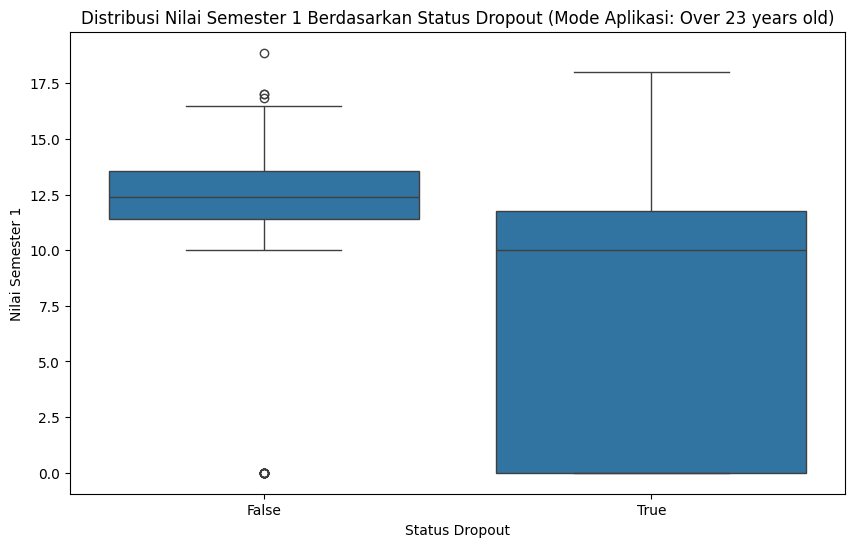

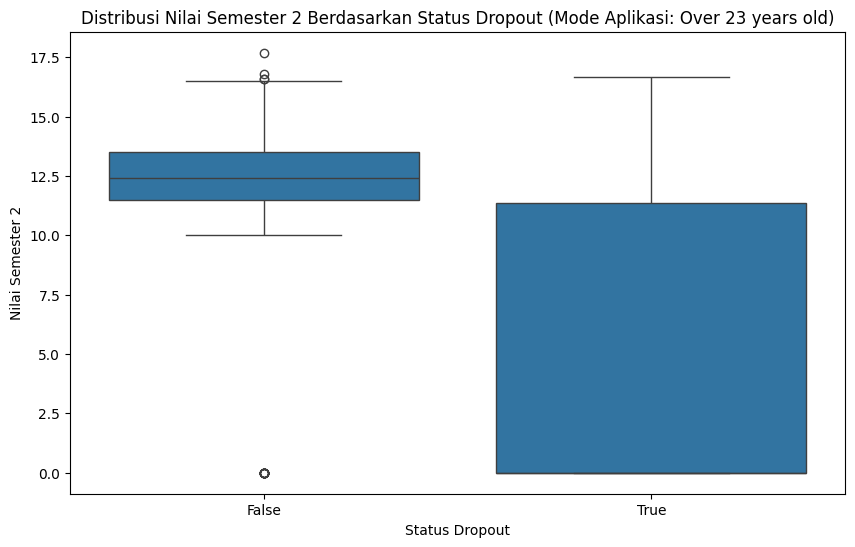

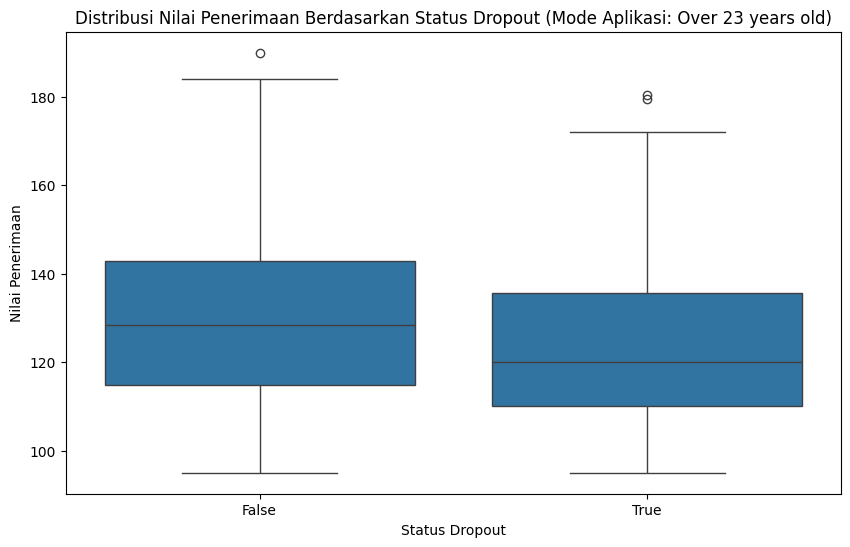

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_over_23_mode, x='Status_Dropout', y='Curricular_units_1st_sem_grade')
plt.xlabel('Status Dropout')
plt.ylabel('Nilai Semester 1')
plt.title('Distribusi Nilai Semester 1 Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_over_23_mode, x='Status_Dropout', y='Curricular_units_2nd_sem_grade')
plt.xlabel('Status Dropout')
plt.ylabel('Nilai Semester 2')
plt.title('Distribusi Nilai Semester 2 Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_over_23_mode, x='Status_Dropout', y='Admission_grade')
plt.xlabel('Status Dropout')
plt.ylabel('Nilai Penerimaan')
plt.title('Distribusi Nilai Penerimaan Berdasarkan Status Dropout (Mode Aplikasi: Over 23 years old)')
plt.show()

Dari hasil plot peforma akademik, terlihat bahwa mahasiswa yang dropout pada mode aplikasi "Over 23 years old" cenderung memiliki nilai penerimaan yang lebih rendah serta kinerja akademik yang lebih buruk pada semester pertama dan kedua dibandingkan dengan mahasiswa yang tidak dropout. Hal ini menunjukkan bahwa faktor-faktor seperti nilai penerimaan dan kinerja akademik awal dapat menjadi prediktor potensial untuk tingkat dropout di antara mahasiswa yang mendaftar dengan mode aplikasi tersebut.

## Kesimpulan Analisis Status Dropout Berdasarkan Mode Aplikasi
Berdasarkan distribusi status dropout pada mode aplikasi terlihat bahwa tingkat dropout "Over 23 years old" tertinggi di bandingkan yang lainya dengan persentase dropout sebesar 55.41%.

Terdapat beberapa faktor seperti status perkawinan di mana mahasiswa yang belum menikah memiliki risiko dropout yang lebih tinggi. Namun yang paling menonjol adalah kinerja akademik yang lebih buruk pada semester pertama dan kedua dibandingkan dengan mahasiswa yang tidak dropout, Serta kursus dengan jumlah dropout terbanyak adalah Management (evening attendance).

## Rekomedasi action:

Melakukan pemantauan terhadap progres akademik mahasiswa secara teratur atau Menerapkan sistem peringatan dini yang otomatis untuk mengidentifikasi mahasiswa yang berisiko dropout berdasarkan kinerja akademik mereka. Mahasiswa yang teridentifikasi dapat langsung diberikan dukungan tambahan atau bimbingan.

# Data Preprocessing

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Analisis kolom 'Application_order'

In [40]:
df.Application_order.value_counts()

,count
Application_order,
1,3026
2,547
3,309
4,249
5,154
6,137
9,1
0,1


Terdapat outlier untuk angka 0 dan 9 karena hanya memiliki 1 entri, dan menurut saya kebanyakan pilihan untuk mahasiswa dalam memilih program atau universitas, sebaiknya hanya ada dua pilihan saja, seperti pilihan pertama atau pilihan kedua

Mengubah nilai di kolom Application_order menjadi "First Choice" dan "Second Choice"

In [41]:
df['Application_order'] = df['Application_order'].apply(lambda x: "First Choice" if x == 1 else "Second Choice")
df['Application_order'].value_counts()

,count
Application_order,
First Choice,3026
Second Choice,1398


Analisi kolom Marital_status

In [42]:
df.Marital_status.value_counts()

,count
Marital_status,
1,3919
2,379
4,91
5,25
6,6
3,4


mengelompokkan status 'Menikah' agar lebih umum
- kategori 1 (single) tetap **single**
- untuk kategori 2 (married) dan 5 (facto union) menjadi **Married**
- serta untuk kategori 3 (widower), 4 (divorced), dan 6 (legally separated) menjadi **divorced**.

In [43]:
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Divorced',
    4: 'Divorced',
    5: 'Married',
    6: 'Divorced'
}

df['Marital_status'] = df['Marital_status'].map(marital_mapping)
df.Marital_status.value_counts()

,count
Marital_status,
Single,3919
Married,404
Divorced,101


### Mapping kolom-kolom sesuai dengan deskripsinya agar lebih mudah dipahami dan pada saat tahap deployment tampilan Aplikasi nya lebih baik

In [44]:
df.Course.value_counts()

,count
Course,
9500,766
9147,380
9238,355
9085,337
9773,331
9670,268
9991,268
9254,252
9070,226


Mapping kolom Course

In [45]:
course_mapping = {
    9500: 'Nursing',
    9147: 'Management',
    9238: 'Social Service',
    9085: 'Veterinary Nursing',
    9773: 'Journalism and Communication',
    9670: 'Advertising and Marketing Management',
    9991: 'Management (evening attendance)',
    9254: 'Tourism',
    9070: 'Communication Design',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9853: 'Basic Education',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9556: 'Oral Hygiene',
    33: 'Biofuel Production Technologies'
}

df['Course'] = df['Course'].map(course_mapping)
df.Course.value_counts()

,count
Course,
Nursing,766
Management,380
Social Service,355
Veterinary Nursing,337
Journalism and Communication,331
Advertising and Marketing Management,268
Management (evening attendance),268
Tourism,252
Communication Design,226


kolom Daytime_evening_attendance

In [46]:
attendance_mapping = {
    1: 'Daytime',
    0: 'Evening'
}

df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(attendance_mapping)
df.Daytime_evening_attendance.value_counts()

,count
Daytime_evening_attendance,
Daytime,3941
Evening,483


kolom Previous_qualification

In [47]:
qualification_mapping = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

df['Previous_qualification'] = df['Previous_qualification'].map(qualification_mapping)
df.Previous_qualification.value_counts()

,count
Previous_qualification,
Secondary education,3717
Technological specialization course,219
Basic education 3rd cycle (9th/10th/11th year) or equiv.,162
Higher education - degree,126
Other - 11th year of schooling,45
Higher education - degree (1st cycle),40
Professional higher technical course,36
Higher education - bachelor's degree,23
Frequency of higher education,16


Menyederhanakan kualifikasi pendidikan ke dalam kategori yang lebih umum agar lebih mudah dimengerti.

In [48]:
def simplify_qualification(qual):
    if 'Secondary education' in qual:
        return 'Secondary education'
    elif 'Technological specialization course' in qual:
        return 'Technological specialization'
    elif 'Basic education' in qual:
        return 'Basic education'
    elif 'Higher education' in qual or 'Frequency of higher education' in qual:
        return 'Higher education'
    else:
        return 'Other'

df['Previous_qualification'] = df['Previous_qualification'].apply(simplify_qualification)
df.Previous_qualification.value_counts()

,count
Previous_qualification,
Secondary education,3717
Higher education,220
Technological specialization,219
Basic education,169
Other,99


kolom "Nacionality"

In [49]:
nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

df['Nacionality'] = df['Nacionality'].map(nationality_mapping)
df.Nacionality.value_counts()

,count
Nacionality,
Portuguese,4314
Brazilian,38
Santomean,14
Spanish,13
Cape Verdean,13
Guinean,5
Moldova (Republic of),3
Italian,3
Ukrainian,3


Mapping untuk Kolom Mothers_qualification, Fathers_qualification, Mothers_occupation, Fathers_occupation

In [50]:
mothers_qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    34: 'Unknown',
    35: "Can't read or write",
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

df['Mothers_qualification'] = df['Mothers_qualification'].map(mothers_qualification_mapping)
df.Mothers_qualification.value_counts()

,count
Mothers_qualification,
Secondary Education - 12th Year of Schooling or Eq.,1069
Basic education 1st cycle (4th/5th year) or equiv.,1009
Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,953
Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,562
Higher Education - Degree,438
Unknown,130
Higher Education - Bachelor's Degree,83
Higher Education - Master's,49
Other - 11th Year of Schooling,42


Menyederhanakan kualifikasi ibu ke dalam kategori yang lebih umum agar lebih mudah dimengerti

In [51]:
qualification_mapping = {
    'Secondary Education - 12th Year of Schooling or Eq.': 'Secondary Education',
    'Basic education 1st cycle (4th/5th year) or equiv.': 'Basic Education',
    'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.': 'Basic Education',
    'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.': 'Basic Education',
    'Higher Education - Degree': 'Higher Education',
    'Unknown': 'Other',
    'Higher Education - Bachelor\'s Degree': 'Higher Education',
    'Higher Education - Master\'s': 'Higher Education',
    'Other - 11th Year of Schooling': 'Other',
    'Higher Education - Doctorate': 'Higher Education',
    'Higher education - degree (1st cycle)': 'Higher Education',
    '12th Year of Schooling - Not Completed': 'Secondary Education',
    'Technological specialization course': 'Higher Education',
    'Specialized higher studies course': 'Higher Education',
    'Professional higher technical course': 'Higher Education',
    'Frequency of Higher Education': 'Higher Education',
    'Higher Education - Master (2nd cycle)': 'Higher Education',
    '8th year of schooling': 'Basic Education',
    'Can\'t read or write': 'Other',
    'Can read without having a 4th year of schooling': 'Other',
    '7th Year (Old)': 'Basic Education',
    '9th Year of Schooling - Not Completed': 'Basic Education',
    '11th Year of Schooling - Not Completed': 'Secondary Education',
    '10th Year of Schooling': 'Basic Education',
    'General commerce course': 'Other',
    'Technical-professional course': 'Higher Education',
    '2nd cycle of the general high school course': 'Secondary Education',
    '7th year of schooling': 'Basic Education',
    'Higher Education - Doctorate (3rd cycle)': 'Higher Education'
}

df['Mothers_qualification'] = df['Mothers_qualification'].map(qualification_mapping)
df['Mothers_qualification'].value_counts()

,count
Mothers_qualification,
Basic Education,2536
Secondary Education,1081
Higher Education,628
Other,179


In [52]:
fathers_qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: "Can't read or write",
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

df['Fathers_qualification'] = df['Fathers_qualification'].map(fathers_qualification_mapping)
df.Fathers_qualification.value_counts()

,count
Fathers_qualification,
Basic education 1st cycle (4th/5th year) or equiv.,1209
Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.,968
Secondary Education - 12th Year of Schooling or Eq.,904
Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.,702
Higher Education - Degree,282
Unknown,112
Higher Education - Bachelor's Degree,68
Higher Education - Master's,39
Other - 11th Year of Schooling,38


Menyederhanakan kualifikasi ayah ke dalam kategori yang lebih umum agar lebih mudah dimengerti dan meminimalkan outlier

In [53]:
qualification_mapping = {
    'Secondary Education - 12th Year of Schooling or Eq.': 'Secondary Education',
    'Basic education 1st cycle (4th/5th year) or equiv.': 'Basic Education',
    'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.': 'Basic Education',
    'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.': 'Basic Education',
    'Higher Education - Degree': 'Higher Education',
    'Unknown': 'Other',
    'Higher Education - Bachelor\'s Degree': 'Higher Education',
    'Higher Education - Master\'s': 'Higher Education',
    'Other - 11th Year of Schooling': 'Other',
    'Higher Education - Doctorate': 'Higher Education',
    'Higher education - degree (1st cycle)': 'Higher Education',
    '12th Year of Schooling - Not Completed': 'Secondary Education',
    'Technological specialization course': 'Higher Education',
    'Specialized higher studies course': 'Higher Education',
    'Professional higher technical course': 'Higher Education',
    'Frequency of Higher Education': 'Higher Education',
    'Higher Education - Master (2nd cycle)': 'Higher Education',
    '8th year of schooling': 'Basic Education',
    'Can\'t read or write': 'Other',
    'Can read without having a 4th year of schooling': 'Other',
    '7th Year (Old)': 'Basic Education',
    '9th Year of Schooling - Not Completed': 'Basic Education',
    '11th Year of Schooling - Not Completed': 'Secondary Education',
    '10th Year of Schooling': 'Basic Education',
    'General commerce course': 'Other',
    'Technical-professional course': 'Higher Education',
    '2nd cycle of the general high school course': 'Secondary Education',
    '7th year of schooling': 'Basic Education',
    'Higher Education - Doctorate (3rd cycle)': 'Higher Education',
    'Complementary High School Course - not concluded': 'Secondary Education',
    'Supplementary Accounting and Administration': 'Other',
    'Complementary High School Course': 'Secondary Education',
    '2nd year complementary high school course': 'Secondary Education',
    'General Course of Administration and Commerce': 'Other'
}

df['Fathers_qualification'] = df['Fathers_qualification'].map(qualification_mapping)
df.Fathers_qualification.value_counts()

,count
Fathers_qualification,
Basic Education,2902
Secondary Education,915
Higher Education,444
Other,163


In [54]:
mothers_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers, and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    7: 'Skilled Workers in Industry, Construction, and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries, and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing, and transport',
    194: 'Meal preparation assistants'
}

df['Mothers_occupation'] = df['Mothers_occupation'].map(mothers_occupation_mapping)
df.Mothers_occupation.value_counts()

,count
Mothers_occupation,
Unskilled Workers,1577
Administrative staff,817
"Personal Services, Security and Safety Workers, and Sellers",530
Intermediate Level Technicians and Professions,351
Specialists in Intellectual and Scientific Activities,318
"Skilled Workers in Industry, Construction, and Craftsmen",272
Student,144
"Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers",102
"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",91


Menyederhanakan pekerjaan ibu ke dalam kategori yang lebih umum agar lebih mudah dimengerti dan meminimalkan outlier

In [55]:
occupation_mapping = {
    'Unskilled Workers': 'Unskilled Workers',
    'Administrative staff': 'Administrative Staff',
    'Personal Services, Security and Safety Workers, and Sellers': 'Service Workers',
    'Intermediate Level Technicians and Professions': 'Technicians',
    'Specialists in Intellectual and Scientific Activities': 'Professionals',
    'Skilled Workers in Industry, Construction, and Craftsmen': 'Skilled Workers',
    'Student': 'Student',
    'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers': 'Managers',
    'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry': 'Agricultural Workers',
    'Other Situation': 'Other',
    'Installation and Machine Operators and Assembly Workers': 'Machine Operators',
    'Cleaning workers': 'Service Workers',
    'Blank': 'Other',
    'Meal preparation assistants': 'Service Workers',
    'Office workers, secretaries in general and data processing operators': 'Administrative Staff',
    'Teachers': 'Professionals',
    'Other administrative support staff': 'Administrative Staff',
    'Workers in food processing, woodworking, clothing and other industries and crafts': 'Skilled Workers',
    'Unskilled workers in agriculture, animal production, fisheries, and forestry': 'Unskilled Workers',
    'Unskilled workers in extractive industry, construction, manufacturing, and transport': 'Unskilled Workers',
    'Intermediate level technicians from legal, social, sports, cultural and similar services': 'Technicians',
    'Armed Forces Professions': 'Other',
    'Data, accounting, statistical, financial services and registry-related operators': 'Administrative Staff',
    'Personal service workers': 'Service Workers',
    'Technicians and professionals, of intermediate level of health': 'Technicians',
    'Sellers': 'Service Workers',
    'Health professionals': 'Professionals',
    'Personal care workers and the like': 'Service Workers',
    'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like': 'Skilled Workers',
    'Specialists in information and communication technologies (ICT)': 'Professionals',
    'Intermediate level science and engineering technicians and professions': 'Technicians',
    'Skilled construction workers and the like, except electricians': 'Skilled Workers'
}

df['Mothers_occupation'] = df['Mothers_occupation'].map(occupation_mapping)
df.Mothers_occupation.value_counts()

,count
Mothers_occupation,
Unskilled Workers,1586
Administrative Staff,834
Service Workers,574
Technicians,359
Professionals,328
Skilled Workers,279
Student,144
Managers,102
Agricultural Workers,91


In [56]:
fathers_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers, and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    7: 'Skilled Workers in Industry, Construction, and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries, and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

df['Fathers_occupation'] = df['Fathers_occupation'].map(fathers_occupation_mapping)
df.Fathers_occupation.value_counts()

,count
Fathers_occupation,
Unskilled Workers,1010
"Skilled Workers in Industry, Construction, and Craftsmen",666
"Personal Services, Security and Safety Workers, and Sellers",516
Administrative staff,386
Intermediate Level Technicians and Professions,384
Installation and Machine Operators and Assembly Workers,318
Armed Forces Professions,266
"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",242
Specialists in Intellectual and Scientific Activities,197


Menyederhanakan pekerjaan ayah ke dalam kategori yang lebih umum agar lebih mudah dimengerti dan meminimalkan outlier

In [57]:
occupation_mapping = {
    'Unskilled Workers': 'Unskilled Workers',
    'Skilled Workers in Industry, Construction, and Craftsmen': 'Skilled Workers',
    'Personal Services, Security and Safety Workers, and Sellers': 'Service Workers',
    'Administrative staff': 'Administrative Staff',
    'Intermediate Level Technicians and Professions': 'Technicians',
    'Installation and Machine Operators and Assembly Workers': 'Machine Operators',
    'Armed Forces Professions': 'Armed Forces',
    'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry': 'Agricultural Workers',
    'Specialists in Intellectual and Scientific Activities': 'Professionals',
    'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers': 'Managers',
    'Student': 'Student',
    'Other Situation': 'Other',
    'Blank': 'Other',
    'Unskilled workers in extractive industry, construction, manufacturing and transport': 'Unskilled Workers',
    'Other administrative support staff': 'Administrative Staff',
    'Skilled construction workers and the like, except electricians': 'Skilled Workers',
    'Unskilled workers in agriculture, animal production, fisheries, and forestry': 'Unskilled Workers',
    'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence': 'Agricultural Workers',
    'Other Armed Forces personnel': 'Armed Forces',
    'Workers in food processing, woodworking, clothing and other industries and crafts': 'Skilled Workers',
    'Information and communication technology technicians': 'Technicians',
    'Vehicle drivers and mobile equipment operators': 'Machine Operators',
    'Sellers': 'Service Workers',
    'Teachers': 'Professionals',
    'Fixed plant and machine operators': 'Machine Operators',
    'Meal preparation assistants': 'Service Workers',
    'Assembly workers': 'Machine Operators',
    'Directors of administrative and commercial services': 'Managers',
    'Personal service workers': 'Service Workers',
    'Skilled workers in metallurgy, metalworking and similar': 'Skilled Workers',
    'Health professionals': 'Professionals',
    'Armed Forces Sergeants': 'Armed Forces',
    'Personal care workers and the like': 'Service Workers',
    'Armed Forces Officers': 'Armed Forces',
    'Hotel, catering, trade and other services directors': 'Managers',
    'Skilled workers in electricity and electronics': 'Skilled Workers',
    'Office workers, secretaries in general and data processing operators': 'Administrative Staff',
    'Technicians and professionals, of intermediate level of health': 'Technicians',
    'Intermediate level technicians from legal, social, sports, cultural and similar services': 'Technicians',
    'Data, accounting, statistical, financial services and registry-related operators': 'Administrative Staff',
    'Intermediate level science and engineering technicians and professions': 'Technicians',
    'Market-oriented farmers and skilled agricultural and animal production workers': 'Agricultural Workers',
    'Street vendors (except food) and street service providers': 'Service Workers',
    'Specialists in the physical sciences, mathematics, engineering, and related techniques': 'Professionals',
    'Specialists in finance, accounting, administrative organization, public and commercial relations': 'Professionals',
    'Protection and security services personnel': 'Service Workers'
}

df['Fathers_occupation'] = df['Fathers_occupation'].map(occupation_mapping)
df.Fathers_occupation.value_counts()

,count
Fathers_occupation,
Unskilled Workers,1031
Skilled Workers,681
Service Workers,526
Administrative Staff,396
Technicians,390
Machine Operators,326
Armed Forces,273
Agricultural Workers,248
Professionals,204


Mapping untuk kolom Displaced, Debtor, Tuition_fees_up_to_date, Gender, Scholarship_holder dan International sesuai dengan deskripsinya

In [58]:
displaced_mapping = {1: 'Yes', 0: 'No'}

special_needs_mapping = {1: 'Yes', 0: 'No'}

debtor_mapping = {1: 'Yes', 0: 'No'}

tuition_fees_mapping = {1: 'Yes', 0: 'No'}

gender_mapping = {1: 'Male', 0: 'Female'}

scholarship_mapping = {1: 'Yes', 0: 'No'}

international_mapping = {1: 'Yes', 0: 'No'}

df['Displaced'] = df['Displaced'].map(displaced_mapping)
df['Educational_special_needs'] = df['Educational_special_needs'].map(special_needs_mapping)
df['Debtor'] = df['Debtor'].map(debtor_mapping)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(tuition_fees_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Scholarship_holder'] = df['Scholarship_holder'].map(scholarship_mapping)
df['International'] = df['International'].map(international_mapping)

In [59]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_Dropout,Status_Enrolled,Status_Graduate
0,Single,2nd phase - general contingent,Second Choice,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education,Other,Service Workers,Unskilled Workers,127.3,Yes,No,No,Yes,Male,No,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1,True,False,False
1,Single,International student (bachelor),First Choice,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education,Higher Education,Technicians,Technicians,142.5,Yes,No,No,No,Male,No,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,False,False,True
2,Single,1st phase - general contingent,Second Choice,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Education,Basic Education,Unskilled Workers,Unskilled Workers,124.8,Yes,No,No,No,Male,No,19,No,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1,True,False,False
3,Single,2nd phase - general contingent,Second Choice,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education,Basic Education,Service Workers,Technicians,119.6,Yes,No,No,Yes,Female,No,20,No,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,False,False,True
4,Married,Over 23 years old,First Choice,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Education,Basic Education,Unskilled Workers,Unskilled Workers,141.5,No,No,No,Yes,Female,No,45,No,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,False,False,True


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

Simpan DataFrame ke file CSV untuk pembuatan dashboard

In [61]:
df.to_csv('data.csv', index=False)

In [62]:
df.describe()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.680154
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.759359
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


## Check Numerical

pasangan fitur dengan korelasi di atas 0.7

In [63]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr().abs()

high_corr_pairs = (correlation_matrix > 0.7) & (correlation_matrix < 1)
high_corr_indices = np.where(high_corr_pairs)
high_corr_columns = [(numeric_columns[i], numeric_columns[j]) for i, j in zip(*high_corr_indices) if i < j]

high_corr_columns

[('Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled'),
 ('Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited'),
 ('Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved'),
 ('Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_credited'),
 ('Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled'),
 ('Curricular_units_1st_sem_evaluations',
  'Curricular_units_2nd_sem_evaluations'),
 ('Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_enrolled'),
 ('Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved'),
 ('Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade'),
 ('Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved'),
 ('Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade')]

Menghapus salah satu pasangan kolom yang korelasinya tinggi. Tidak ada standar pasti untuk menentukan nilai korelasi yang dianggap tinggi, tetapi biasanya angka 0.7 digunakan sebagai acuan.

In [64]:
correlation_matrix = df.corr(numeric_only=True).abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop_hicorr

['Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Status_Enrolled',
 'Status_Graduate']

In [65]:
df.drop(to_drop_hicorr, axis=1, inplace=True)
print("Ukuran DataFrame setelah penghapusan kolom:", df.shape)

Ukuran DataFrame setelah penghapusan kolom: (4424, 31)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

## Check Categorical

In [67]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True) * 100)
    print('\n')

Marital_status
Single      88.584991
Married      9.132007
Divorced     2.283002
Name: proportion, dtype: float64


Application_mode
1st phase - general contingent                         38.607595
2nd phase - general contingent                         19.710669
Over 23 years old                                      17.744123
Change of course                                        7.052441
Technological specialization diploma holders            4.814647
Holders of other higher courses                         3.141953
3rd phase - general contingent                          2.802893
Transfer                                                1.740506
Change of institution/course                            1.333635
1st phase - special contingent (Madeira Island)         0.858951
Short cycle diploma holders                             0.791139
International student (bachelor)                        0.678119
1st phase - special contingent (Azores Island)          0.361664
Ordinance No. 854-B/99

Fitur yang didominasi oleh salah satu nilai saja di atas 70% akan di hapus

In [68]:
columns_to_drop = ['Marital_status', 'Daytime_evening_attendance', 'Previous_qualification',
                   'Nacionality', 'Educational_special_needs', 'Debtor',
                   'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']

df.drop(columns=columns_to_drop, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application_mode                              4424 non-null   object 
 1   Application_order                             4424 non-null   object 
 2   Course                                        4424 non-null   object 
 3   Previous_qualification_grade                  4424 non-null   float64
 4   Mothers_qualification                         4424 non-null   object 
 5   Fathers_qualification                         4424 non-null   object 
 6   Mothers_occupation                            4424 non-null   object 
 7   Fathers_occupation                            4424 non-null   object 
 8   Admission_grade                               4424 non-null   float64
 9   Displaced                                     4424 non-null   o

Menghapus Status 'Enrolled' karena tujuan nya adalah untuk memprediksi apakah seorang mahasiswa akan lulus atau keluar (dropout)

In [70]:
df = df[df['Status'] != 2]

distribusi kelas pada kolom 'Status'

In [71]:
df.Status.value_counts()

,count
Status,
0,2209
1,1421


hasilnya menunjukkan ketidakseimbangan dalam distribusi kelas atau imbalance class.

In [72]:
df.tail()

,Application_mode,Application_order,Course,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Gender,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_Dropout
4419,1st phase - general contingent,Second Choice,Journalism and Communication,125.0,Secondary Education,Secondary Education,Service Workers,Administrative Staff,122.2,No,Male,19,0,7,13.600000,0,0,15.5,2.8,-4.06,0,False
4420,1st phase - general contingent,Second Choice,Journalism and Communication,120.0,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,119.0,Yes,Female,18,0,6,12.000000,0,0,11.1,0.6,2.02,1,True
4421,1st phase - general contingent,First Choice,Nursing,154.0,Basic Education,Basic Education,Unskilled Workers,Unskilled Workers,149.5,Yes,Female,30,0,8,14.912500,0,0,13.9,-0.3,0.79,1,True
4422,1st phase - general contingent,First Choice,Management,180.0,Basic Education,Basic Education,Skilled Workers,Administrative Staff,153.8,Yes,Female,20,0,5,13.800000,0,0,9.4,-0.8,-3.12,0,False
4423,Ordinance No. 854-B/99,First Choice,Journalism and Communication,152.0,Basic Education,Basic Education,Service Workers,Unskilled Workers,152.0,Yes,Female,22,0,8,11.666667,0,0,12.7,3.7,-1.70,0,False


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application_mode                              3630 non-null   object 
 1   Application_order                             3630 non-null   object 
 2   Course                                        3630 non-null   object 
 3   Previous_qualification_grade                  3630 non-null   float64
 4   Mothers_qualification                         3630 non-null   object 
 5   Fathers_qualification                         3630 non-null   object 
 6   Mothers_occupation                            3630 non-null   object 
 7   Fathers_occupation                            3630 non-null   object 
 8   Admission_grade                               3630 non-null   float64
 9   Displaced                                     3630 non-null   object

# Modeling

### Dataset Splitting

In [74]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2904, 21), (726, 21), (2904,), (726,))

Untuk data numerik, dilakukan imputasi nilai yang hilang dengan median dan penskalaan menggunakan StandardScaler. Sedangkan untuk data kategorikal, nilai yang hilang diimputasi dengan nilai yang paling sering muncul dan dilakukan one-hot encoding untuk mengubahnya menjadi representasi biner dan Menggunakan Yeo-Johnson untuk transformasi data yang digunakan agar distribusi data menjadi lebih mendekati distribusi normal.

In [75]:
numerical_cols = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                  'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
                  'Inflation_rate', 'GDP']

categorical_cols = ['Application_mode', 'Application_order', 'Course', 'Mothers_qualification',
                    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
                    'Displaced', 'Gender']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('yeojohnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

Melatih tiga model klasifikasi: Regresi Logistik, SVM, dan Gradient Boosting, untuk menentukan algoritma terbaik.

In [76]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

Train dan Evaluasi untuk tiga model klasifikasi: Regresi Logistik, SVM, dan Gradient Boosting.

Evaluasi Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       442
           1       0.80      0.70      0.75       284

    accuracy                           0.82       726
   macro avg       0.81      0.80      0.80       726
weighted avg       0.81      0.82      0.81       726

Confusion Matrix:


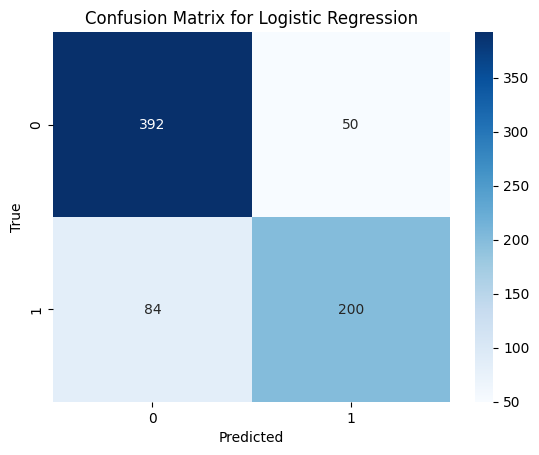

Akurasi: 0.8154269972451791

Evaluasi Model: SVM
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       442
           1       0.85      0.68      0.75       284

    accuracy                           0.83       726
   macro avg       0.83      0.80      0.81       726
weighted avg       0.83      0.83      0.82       726

Confusion Matrix:


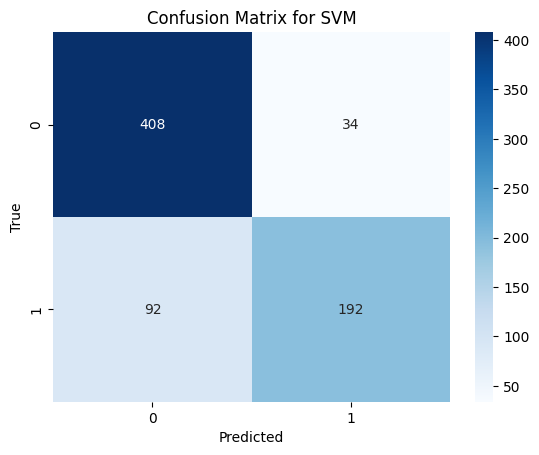

Akurasi: 0.8264462809917356

Evaluasi Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       442
           1       0.81      0.75      0.78       284

    accuracy                           0.83       726
   macro avg       0.83      0.82      0.82       726
weighted avg       0.83      0.83      0.83       726

Confusion Matrix:


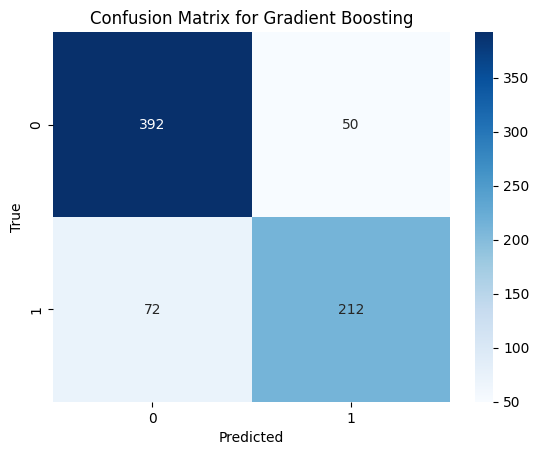

Akurasi: 0.8319559228650137



In [77]:
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Evaluasi Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}\n")

Gradient Boosting memiliki akurasi tertinggi (0.83) dan metrik evaluasi yang lebih baik dibandingkan dengan Logistic Regression dan Support Vector Machine.

Oleh karena itu, berdasarkan hasil ini, Gradient Boosting adalah pilihan terbaik di antara ketiga model yang diuji. Kemudian akan dilakukan tuning parameter lebih lanjut untuk meningkatkan kinerja model Gradient Boosting.

In [78]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.1, 0.05, 0.01],
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
model_xgb.fit(X_train, y_train)

print("Best Parameters:", model_xgb.best_params_)
print("Training Accuracy:", model_xgb.score(X_train, y_train))
print("Model Best Score (XGBoost):", model_xgb.best_score_)
print("Test Accuracy:", model_xgb.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:35:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.9}
Training Accuracy: 0.8646694214876033
Model Best Score (XGBoost): 0.8274734405602707
Test Accuracy: 0.8360881542699724


# Evaluation

In [79]:
y_pred_xgb = model_xgb.predict(X_test)

print("\nConfusion Matrix XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix XGBoost:
[[397  45]
 [ 74 210]]

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       442
           1       0.82      0.74      0.78       284

    accuracy                           0.84       726
   macro avg       0.83      0.82      0.82       726
weighted avg       0.84      0.84      0.83       726



Save model untuk digunakan proses deplotment dengan membuat aplikasi prediksi dropout menggunakan streamlit

In [80]:
joblib.dump(model_xgb, 'model.pkl')

['model.pkl']

Percobaan memprediksi data baru menggunakan model yang telah dilatih

In [81]:
model = joblib.load('model.pkl')

new_data = pd.DataFrame({
    'Application_mode': ['1st phase - general contingent', '1st phase - general contingent', '1st phase - general contingent', '1st phase - general contingent', '1st phase - general contingent'],
    'Application_order': ['First Choice', 'Second Choice', 'First Choice', 'Second Choice', 'First Choice'],
    'Course': ['Journalism and Communication', 'Tourism', 'Communication Design', 'Journalism and Communication', 'Social Service (evening attendance)'],
    'Previous_qualification_grade': [125.0, 160.0, 122.0, 122.0, 100.0],
    'Mothers_qualification': ['Secondary Education - 12th Year of Schooling or Equivalent', 'Secondary Education - 12th Year of Schooling or Equivalent', 'Basic education 1st cycle (4th/5th year) or equivalent', 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent', 'Basic education 1st cycle (4th/5th year) or equivalent'],
    'Fathers_qualification': ['Secondary Education - 12th Year of Schooling or Equivalent', 'Higher Education - Degree', 'Basic education 1st cycle (4th/5th year) or equivalent', 'Basic education 1st cycle (4th/5th year) or equivalent', 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent'],
    'Mothers_occupation': ['Personal Services, Security and Safety Workers n.e.c.', 'Intermediate Level Technicians and Professions', 'Unskilled Workers', 'Personal Services, Security and Safety Workers n.e.c.', 'Unskilled Workers'],
    'Fathers_occupation': ['Administrative staff', 'Intermediate Level Technicians and Professions', 'Unskilled Workers', 'Intermediate Level Technicians and Professions', 'Unskilled Workers'],
    'Admission_grade': [122.2, 142.5, 124.8, 119.6, 141.5],
    'Displaced': ['No', 'Yes', 'Yes', 'Yes', 'No'],
    'Gender': ['Male', 'Male', 'Male', 'Female', 'Female'],
    'Scholarship_holder': ['No', 'No', 'No', 'No', 'No'],
    'Age_at_enrollment': [19, 19, 19, 20, 45],
    'Curricular_units_1st_sem_credited': [0, 0, 0, 0, 0],
    'Curricular_units_1st_sem_evaluations': [7, 6, 0, 8, 9],
    'Curricular_units_1st_sem_grade': [13.6, 14.0, 0.0, 13.428571, 12.333333],
    'Curricular_units_1st_sem_without_evaluations': [0, 0, 0, 0, 0],
    'Curricular_units_2nd_sem_without_evaluations': [0, 6, 0, 0, 0],
    'Unemployment_rate': [15.5, 13.9, 10.8, 9.4, 13.9],
    'Inflation_rate': [2.8, -0.3, 1.4, -0.8, -0.3],
    'GDP': [-4.06, 0.79, 1.74, -3.12, 0.79]
})


pred_prob = model.predict_proba(new_data)
pred_class = model.predict(new_data)

pred_class_labels = ['Graduate' if c == 0 else 'Dropout' for c in pred_class]

results = pd.DataFrame(pred_prob, columns=['Prob_Graduate', 'Prob_Dropout'])
results['Predicted_Class'] = pred_class_labels

print(results)

   Prob_Graduate  Prob_Dropout Predicted_Class
0       0.792034      0.207966        Graduate
1       0.861714      0.138286        Graduate
2       0.044140      0.955860         Dropout
3       0.817543      0.182457        Graduate
4       0.851557      0.148443        Graduate


In [82]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>